# PARTE 1.3: QUESTIONARY DATA CLEAN UP

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

*   Link para Questionary_Data: 2017_2020: https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire&Cycle=2017-2020
*   Link para Questionary_Data: 2015_2016: https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire&CycleBeginYear=2015

## Indice

In [ ]:
a = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv')
a.shape

(25531, 56)

In [ ]:
a = a['SEQN']
a.head()

0    109263.0
1    109264.0
2    109265.0
3    109266.0
4    109267.0
Name: SEQN, dtype: float64

In [ ]:
a.to_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv', index=False)


## Alcohol Use  P_ALQ

In [ ]:
alcohol_2017 = pd.read_csv("/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/P_ALQ_2017.csv")
alcohol_2015 = pd.read_csv("/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/ALQ_I_2015.csv")

### Codebook 2017-2020

*  SEQN - Respondent sequence number
*  ALQ111 - Ever had a drink of any kind of alcohol
*  ALQ121 - Past 12 mo how often drink alcoholic bev
*  ALQ130 - Avg # alcoholic drinks/day - past 12 mos
*  ALQ142 - # days have 4 or 5 drinks/past 12 mos
*  ALQ270 - # times 4-5 drinks in 2hrs/past 12 mos
*  ALQ280 - # times 8+ drinks in 1 day/past 12 mos
*  ALQ290 - # times 12+ drinks in 1 day/past 12 mos
*  ALQ151 - Ever have 4/5 or more drinks every day?
*  ALQ170CK - CHECK ITEM
*  ALQ170 - Past 30 days # times 4-5 drinks on an oc



In [ ]:
alcohol_2017.head()

SEQN  ALQ111        ALQ121  ALQ130        ALQ142  ALQ270        ALQ280  \
0  109266.0     1.0  1.000000e+01     1.0  5.397605e-79     NaN           NaN   
1  109271.0     1.0  5.397605e-79     NaN           NaN     NaN           NaN   
2  109273.0     1.0  5.397605e-79     NaN           NaN     NaN           NaN   
3  109274.0     1.0  4.000000e+00     2.0  5.000000e+00     7.0  5.397605e-79   
4  109282.0     1.0  5.397605e-79     NaN           NaN     NaN           NaN   

   ALQ290  ALQ151        ALQ170  
0     NaN     2.0  5.397605e-79  
1     NaN     1.0           NaN  
2     NaN     2.0           NaN  
3     NaN     2.0  5.397605e-79  
4     NaN     2.0           NaN

In [ ]:
alcohol_2015.head()

SEQN  ALQ101  ALQ110       ALQ120Q  ALQ120U  ALQ130       ALQ141Q  \
0  83732.0     1.0     NaN  1.000000e+00      2.0     1.0  5.397605e-79   
1  83733.0     1.0     NaN  7.000000e+00      1.0     6.0  7.000000e+00   
2  83734.0     1.0     NaN  5.397605e-79      NaN     NaN           NaN   
3  83735.0     2.0     1.0  3.000000e+00      3.0     1.0  5.397605e-79   
4  83736.0     2.0     1.0  1.000000e+00      3.0     1.0  5.397605e-79   

   ALQ141U  ALQ151        ALQ160  
0      NaN     2.0           NaN  
1      1.0     1.0  5.397605e-79  
2      NaN     1.0           NaN  
3      NaN     2.0           NaN  
4      NaN     2.0           NaN

In [ ]:
#Nos quedamos con una unidad de la variables con las variables comunes que ademas son las que tienen mas sentido
alcohol_2017 = alcohol_2017[['SEQN','ALQ130', 'ALQ151']]
alcohol_2015 = alcohol_2015[['SEQN','ALQ130', 'ALQ151']]

In [ ]:
alcohol_2017.head()

SEQN  ALQ130  ALQ151
0  109266.0     1.0     2.0
1  109271.0     NaN     1.0
2  109273.0     NaN     2.0
3  109274.0     2.0     2.0
4  109282.0     NaN     2.0

In [ ]:
alcohol_2015.head()

SEQN  ALQ130  ALQ151
0  83732.0     1.0     2.0
1  83733.0     6.0     1.0
2  83734.0     NaN     1.0
3  83735.0     1.0     2.0
4  83736.0     1.0     2.0

In [ ]:
alcohol_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    5735 non-null   float64
 1   ALQ130  3379 non-null   float64
 2   ALQ151  4222 non-null   float64
dtypes: float64(3)
memory usage: 134.5 KB


In [ ]:
alcohol_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8965 entries, 0 to 8964
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    8965 non-null   float64
 1   ALQ130  5863 non-null   float64
 2   ALQ151  7501 non-null   float64
dtypes: float64(3)
memory usage: 210.2 KB


### Concat 2017-2020 y 2015-2016

In [ ]:
# Juntamos los datos de 2017 con 2015
alcohol = pd.concat([alcohol_2017, alcohol_2015], axis=0)

In [ ]:
alcohol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14700 entries, 0 to 5734
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    14700 non-null  float64
 1   ALQ130  9242 non-null   float64
 2   ALQ151  11723 non-null  float64
dtypes: float64(3)
memory usage: 459.4 KB


In [ ]:
# Renombramos las columnas para que sea mas facil identificar que significan
alcohol.rename(columns={'ALQ130': 'Drinks/day(1y)', 'ALQ151': '4-5drinks/day'}, inplace=True)

In [ ]:
alcohol.head()

SEQN  Drinks/day(1y)  4-5drinks/day
0  109266.0             1.0            2.0
1  109271.0             NaN            1.0
2  109273.0             NaN            2.0
3  109274.0             2.0            2.0
4  109282.0             NaN            2.0

In [ ]:
alcohol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14700 entries, 0 to 5734
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SEQN            14700 non-null  float64
 1   Drinks/day(1y)  9242 non-null   float64
 2   4-5drinks/day   11723 non-null  float64
dtypes: float64(3)
memory usage: 459.4 KB


In [ ]:
alcohol.nunique()

SEQN              14700
Drinks/day(1y)       17
4-5drinks/day         4
dtype: int64

In [ ]:
#Adjuntamos la columna de alcohol al dataset QUESTIONARY.CSV usando SEQN como identificador comun
questionary_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv')
pd.merge(questionary_df, alcohol, on='SEQN', how='left').to_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv', index=False)

In [ ]:
# Comprobamos que la columna se ha añadido bien al csv de laboratory
questionary_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv')
questionary_df.head()

SEQN  Drinks/day(1y)  4-5drinks/day
0  109263.0             NaN            NaN
1  109264.0             NaN            NaN
2  109265.0             NaN            NaN
3  109266.0             1.0            2.0
4  109267.0             NaN            NaN

## Blood Pressure & Cholesterol  P_BPQ

In [ ]:
bloodquest_2017 = pd.read_csv("/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/P_BPQ_2017.csv")
bloodquest_2015 = pd.read_csv("/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/BPQ_I_2015.csv")

### Codebook 2017-2020

*  SEQN - Respondent sequence number
*  BPQ020 - Ever told you had high blood pressure
*  BPQ030 - Told had high blood pressure - 2+ times
*  BPD035 - Age told had hypertension
*  BPQ040A - Taking prescription for hypertension
*  BPQ050A - Now taking prescribed medicine for HBP
*  BPQ080 - Doctor told you - high cholesterol level
*  BPQ060 - Ever had blood cholesterol checked
*  BPQ070 - When blood cholesterol last checked
*  BPQ090D - Told to take prescriptn for cholesterol
*  BPQ100D - Now taking prescribed medicine



In [ ]:
bloodquest_2017.head()

SEQN  BPQ020  BPQ030  BPD035  BPQ040A  BPQ050A  BPQ080  BPQ060  BPQ070  \
0  109266.0     2.0     NaN     NaN      NaN      NaN     1.0     NaN     1.0   
1  109267.0     2.0     NaN     NaN      NaN      NaN     2.0     1.0     2.0   
2  109268.0     2.0     NaN     NaN      NaN      NaN     2.0     9.0     NaN   
3  109271.0     2.0     NaN     NaN      NaN      NaN     1.0     NaN     1.0   
4  109273.0     2.0     NaN     NaN      NaN      NaN     2.0     1.0     4.0   

   BPQ090D  BPQ100D  
0      2.0      NaN  
1      2.0      NaN  
2      NaN      NaN  
3      1.0      1.0  
4      2.0      NaN

In [ ]:
bloodquest_2015.head()

SEQN  BPQ020  BPQ030  BPD035  BPQ040A  BPQ050A  BPQ080  BPQ060  BPQ070  \
0  83732.0     2.0     NaN     NaN      NaN      NaN     2.0     1.0     1.0   
1  83733.0     2.0     NaN     NaN      NaN      NaN     2.0     2.0     NaN   
2  83734.0     1.0     1.0    55.0      1.0      1.0     1.0     NaN     1.0   
3  83735.0     2.0     NaN     NaN      NaN      NaN     2.0     1.0     2.0   
4  83736.0     2.0     NaN     NaN      NaN      NaN     2.0     1.0     1.0   

   BPQ090D  BPQ100D  
0      2.0      NaN  
1      NaN      NaN  
2      1.0      2.0  
3      2.0      NaN  
4      2.0      NaN

In [ ]:
#Nos quedamos con las variables interesante:
bloodquest_2017 = bloodquest_2017[['SEQN', 'BPQ020', 'BPQ040A', 'BPQ050A', 'BPQ080', 'BPQ090D', 'BPQ100D']]
bloodquest_2015 = bloodquest_2015[['SEQN', 'BPQ020', 'BPQ040A', 'BPQ050A', 'BPQ080', 'BPQ090D', 'BPQ100D']]

In [ ]:
bloodquest_2017.head()

SEQN  BPQ020  BPQ040A  BPQ050A  BPQ080  BPQ090D  BPQ100D
0  109266.0     2.0      NaN      NaN     1.0      2.0      NaN
1  109267.0     2.0      NaN      NaN     2.0      2.0      NaN
2  109268.0     2.0      NaN      NaN     2.0      NaN      NaN
3  109271.0     2.0      NaN      NaN     1.0      1.0      1.0
4  109273.0     2.0      NaN      NaN     2.0      2.0      NaN

In [ ]:
# Vemos que son booleanas o categoricas
bloodquest_2017.nunique()

SEQN       10195
BPQ020         3
BPQ040A        4
BPQ050A        2
BPQ080         4
BPQ090D        4
BPQ100D        3
dtype: int64

### Concat 2017-2020 y 2015-2016

In [ ]:
# Juntamos demo_2017 a demo_2015
bloodquest = pd.concat([bloodquest_2017, bloodquest_2015], axis=0)

In [ ]:
bloodquest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16522 entries, 0 to 6326
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     16522 non-null  float64
 1   BPQ020   16522 non-null  float64
 2   BPQ040A  5687 non-null   float64
 3   BPQ050A  5130 non-null   float64
 4   BPQ080   16522 non-null  float64
 5   BPQ090D  12187 non-null  float64
 6   BPQ100D  4272 non-null   float64
dtypes: float64(7)
memory usage: 1.0 MB


In [ ]:
# Renombramos las columnas para que sea mas facil identificar que significan
bloodquest.rename(columns={'BPQ020': 'Dr_Said_HBP', 'BPQ040A': 'Dr_medicine_HBP', 'BPQ050A': 'Taking_medicine_HBP ', 'BPQ080': 'Dr_Said_Chole', 'BPQ090D': 'Dr_medicine_Chole', 'BPQ100D': 'Taking_medicine_Chole'}, inplace=True)

In [ ]:
bloodquest.head()

SEQN  Dr_Said_HBP  Dr_medicine_HBP  Taking_medicine_HBP   \
0  109266.0          2.0              NaN                   NaN   
1  109267.0          2.0              NaN                   NaN   
2  109268.0          2.0              NaN                   NaN   
3  109271.0          2.0              NaN                   NaN   
4  109273.0          2.0              NaN                   NaN   

   Dr_Said_Chole  Dr_medicine_Chole  Taking_medicine_Chole  
0            1.0                2.0                    NaN  
1            2.0                2.0                    NaN  
2            2.0                NaN                    NaN  
3            1.0                1.0                    1.0  
4            2.0                2.0                    NaN

In [ ]:
bloodquest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16522 entries, 0 to 6326
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SEQN                   16522 non-null  float64
 1   Dr_Said_HBP            16522 non-null  float64
 2   Dr_medicine_HBP        5687 non-null   float64
 3   Taking_medicine_HBP    5130 non-null   float64
 4   Dr_Said_Chole          16522 non-null  float64
 5   Dr_medicine_Chole      12187 non-null  float64
 6   Taking_medicine_Chole  4272 non-null   float64
dtypes: float64(7)
memory usage: 1.0 MB


In [ ]:
#Adjuntamos la columna de alcohol al dataset QUESTIONARY.CSV usando SEQN como identificador comun
questionary_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv')
pd.merge(questionary_df, bloodquest, on='SEQN', how='left').to_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv', index=False)

In [ ]:
# Comprobamos que la columna se ha añadido bien al csv de laboratory
questionary_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv')
questionary_df.head()

SEQN  Drinks/day(1y)  4-5drinks/day  Dr_Said_HBP  Dr_medicine_HBP  \
0  109263.0             NaN            NaN          NaN              NaN   
1  109264.0             NaN            NaN          NaN              NaN   
2  109265.0             NaN            NaN          NaN              NaN   
3  109266.0             1.0            2.0          2.0              NaN   
4  109267.0             NaN            NaN          2.0              NaN   

   Taking_medicine_HBP   Dr_Said_Chole  Dr_medicine_Chole  \
0                   NaN            NaN                NaN   
1                   NaN            NaN                NaN   
2                   NaN            NaN                NaN   
3                   NaN            1.0                2.0   
4                   NaN            2.0                2.0   

   Taking_medicine_Chole  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN

In [ ]:
questionary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25531 entries, 0 to 25530
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SEQN                   25531 non-null  float64
 1   Drinks/day(1y)         9242 non-null   float64
 2   4-5drinks/day          11723 non-null  float64
 3   Dr_Said_HBP            16522 non-null  float64
 4   Dr_medicine_HBP        5687 non-null   float64
 5   Taking_medicine_HBP    5130 non-null   float64
 6   Dr_Said_Chole          16522 non-null  float64
 7   Dr_medicine_Chole      12187 non-null  float64
 8   Taking_medicine_Chole  4272 non-null   float64
dtypes: float64(9)
memory usage: 1.8 MB


## Cardiovascular Health P_CDQ

In [ ]:
CVH_2017 = pd.read_csv("/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/P_CDQ_2017.csv")
CVH_2015 = pd.read_csv("/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/CDQ_I_2015.csv")

### Codebook 2017-2020

*  SEQN - Respondent sequence number
* CDQ001 - SP ever had pain or discomfort in chest
* CDQ002 - SP get it walking uphill or in a hurry
* CDQ003 - During an ordinary pace on level ground
* CDQ003A - CHECK ITEM
* CDQ004 - If so does SP continue or slow down
* CDQ005 - Does standing relieve pain/discomfort
* CDQ006 - How soon is the pain relieved
* CDQ009A - Pain in right arm
* CDQ009B - Pain in right chest
* CDQ009C - Pain in neck
* CDQ009D - Pain in upper sternum
* CDQ009E - Pain in lower sternum
* CDQ009F - Pain in left chest
* CDQ009G - Pain in left arm
* CDQ009H - Pain in epigastric area
* CDQ008 - Severe pain in chest more than half hour
* CDQ010 - Shortness of breath on stairs/inclines




In [ ]:
CVH_2017.head()

SEQN  CDQ001  CDQ002  CDQ003  CDQ004  CDQ005  CDQ006  CDQ009A  CDQ009B  \
0  109271.0     1.0     2.0     NaN     NaN     NaN     NaN      NaN      NaN   
1  109274.0     2.0     NaN     NaN     NaN     NaN     NaN      NaN      NaN   
2  109282.0     1.0     2.0     NaN     NaN     NaN     NaN      NaN      NaN   
3  109283.0     1.0     1.0     2.0     1.0     1.0     2.0      NaN      NaN   
4  109284.0     2.0     NaN     NaN     NaN     NaN     NaN      NaN      NaN   

   CDQ009C  CDQ009D  CDQ009E  CDQ009F  CDQ009G  CDQ009H  CDQ008  CDQ010  
0      NaN      NaN      NaN      NaN      NaN      NaN     2.0     1.0  
1      NaN      NaN      NaN      NaN      NaN      NaN     NaN     2.0  
2      NaN      NaN      NaN      NaN      NaN      NaN     2.0     1.0  
3      NaN      NaN      NaN      NaN      NaN      NaN     1.0     1.0  
4      NaN      NaN      NaN      NaN      NaN      NaN     NaN     2.0

In [ ]:
CVH_2015.head()

SEQN  CDQ001  CDQ002  CDQ003  CDQ004  CDQ005  CDQ006  CDQ009A  CDQ009B  \
0  83732.0     2.0     NaN     NaN     NaN     NaN     NaN      NaN      NaN   
1  83733.0     2.0     NaN     NaN     NaN     NaN     NaN      NaN      NaN   
2  83734.0     1.0     2.0     NaN     NaN     NaN     NaN      NaN      NaN   
3  83735.0     1.0     2.0     NaN     NaN     NaN     NaN      NaN      NaN   
4  83736.0     1.0     2.0     NaN     NaN     NaN     NaN      NaN      NaN   

   CDQ009C  CDQ009D  CDQ009E  CDQ009F  CDQ009G  CDQ009H  CDQ008  CDQ010  
0      NaN      NaN      NaN      NaN      NaN      NaN     NaN     1.0  
1      NaN      NaN      NaN      NaN      NaN      NaN     NaN     2.0  
2      NaN      NaN      NaN      NaN      NaN      NaN     1.0     1.0  
3      NaN      NaN      NaN      NaN      NaN      NaN     2.0     2.0  
4      NaN      NaN      NaN      NaN      NaN      NaN     2.0     1.0

In [ ]:
#Nos quedamos con las variables interesantes CDQ001 - SP ever had pain or discomfort in chest y CDQ010 - Shortness of breath on stairs/inclines:
CVH_2017 = CVH_2017[['SEQN', 'CDQ001', 'CDQ010']]
CVH_2015 = CVH_2015[['SEQN', 'CDQ001', 'CDQ010']]

In [ ]:
CVH_2017.head()

SEQN  CDQ001  CDQ010
0  109271.0     1.0     1.0
1  109274.0     2.0     2.0
2  109282.0     1.0     1.0
3  109283.0     1.0     1.0
4  109284.0     2.0     2.0

In [ ]:
CVH_2015.head()

SEQN  CDQ001  CDQ010
0  83732.0     2.0     1.0
1  83733.0     2.0     2.0
2  83734.0     1.0     1.0
3  83735.0     1.0     2.0
4  83736.0     1.0     1.0

### Concat 2017-2020 y 2015-2016

In [ ]:
# Juntamos 2017 a 2015
CVH = pd.concat([CVH_2017, CVH_2015], axis=0)

In [ ]:
CVH.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10199 entries, 0 to 3765
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    10199 non-null  float64
 1   CDQ001  10197 non-null  float64
 2   CDQ010  10197 non-null  float64
dtypes: float64(3)
memory usage: 318.7 KB


In [ ]:
# Renombramos las columnas para que sea mas facil identificar que significan
CVH.rename(columns={'CDQ001': 'Ever_Pain_Chest', 'CDQ010': 'Shortness_Breath'}, inplace=True)

In [ ]:
CVH.head()

SEQN  Ever_Pain_Chest  Shortness_Breath
0  109271.0              1.0               1.0
1  109274.0              2.0               2.0
2  109282.0              1.0               1.0
3  109283.0              1.0               1.0
4  109284.0              2.0               2.0

In [ ]:
CVH.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10199 entries, 0 to 3765
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SEQN              10199 non-null  float64
 1   Ever_Pain_Chest   10197 non-null  float64
 2   Shortness_Breath  10197 non-null  float64
dtypes: float64(3)
memory usage: 318.7 KB


In [ ]:
#Adjuntamos la columna de alcohol al dataset QUESTIONARY.CSV usando SEQN como identificador comun
questionary_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv')
pd.merge(questionary_df, CVH, on='SEQN', how='left').to_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv', index=False)

In [ ]:
# Comprobamos que la columna se ha añadido bien al csv de laboratory
questionary_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv')
questionary_df.head()

SEQN  Drinks/day(1y)  4-5drinks/day  Dr_Said_HBP  Dr_medicine_HBP  \
0  109263.0             NaN            NaN          NaN              NaN   
1  109264.0             NaN            NaN          NaN              NaN   
2  109265.0             NaN            NaN          NaN              NaN   
3  109266.0             1.0            2.0          2.0              NaN   
4  109267.0             NaN            NaN          2.0              NaN   

   Taking_medicine_HBP   Dr_Said_Chole  Dr_medicine_Chole  \
0                   NaN            NaN                NaN   
1                   NaN            NaN                NaN   
2                   NaN            NaN                NaN   
3                   NaN            1.0                2.0   
4                   NaN            2.0                2.0   

   Taking_medicine_Chole  Ever_Pain_Chest  Shortness_Breath  
0                    NaN              NaN               NaN  
1                    NaN              NaN               NaN  
2                    NaN              NaN               NaN  
3                    NaN              NaN               NaN  
4                    NaN              NaN               NaN

## Diabetes

In [ ]:
DIAB_2017 = pd.read_csv("/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/DIABETES_2017.csv")
DIAB_2015 = pd.read_csv("/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/DIABETES_2015.csv")

In [ ]:
print(DIAB_2017.info())
print(DIAB_2015.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14986 entries, 0 to 14985
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     14986 non-null  float64
 1   DIQ010   14986 non-null  float64
 2   DID040   1443 non-null   float64
 3   DIQ160   9516 non-null   float64
 4   DIQ180   9796 non-null   float64
 5   DIQ050   1445 non-null   float64
 6   DID060   427 non-null    float64
 7   DIQ060U  418 non-null    float64
 8   DIQ070   2679 non-null   float64
 9   DIQ230   1443 non-null   float64
 10  DIQ240   1443 non-null   float64
 11  DID250   1107 non-null   float64
 12  DID260   1440 non-null   float64
 13  DIQ260U  1135 non-null   float64
 14  DIQ275   1443 non-null   float64
 15  DIQ280   1218 non-null   float64
 16  DIQ291   1221 non-null   float64
 17  DIQ300S  1433 non-null   float64
 18  DIQ300D  1433 non-null   float64
 19  DID310S  1435 non-null   float64
 20  DID310D  1435 non-null   float64
 21  DID320   143

In [ ]:
print(DIAB_2017.head())
print(DIAB_2015.head())

       SEQN  DIQ010  DID040  DIQ160  DIQ180  DIQ050  DID060  DIQ060U  DIQ070  \
0  109263.0     2.0     NaN     NaN     NaN     NaN     NaN      NaN     NaN   
1  109264.0     2.0     NaN     2.0     2.0     NaN     NaN      NaN     NaN   
2  109265.0     2.0     NaN     NaN     NaN     NaN     NaN      NaN     NaN   
3  109266.0     2.0     NaN     1.0     1.0     NaN     NaN      NaN     2.0   
4  109267.0     2.0     NaN     2.0     2.0     NaN     NaN      NaN     NaN   

   DIQ230  ...  DIQ300D  DID310S  DID310D  DID320  DID330  DID341  DID350  \
0     NaN  ...      NaN      NaN      NaN     NaN     NaN     NaN     NaN   
1     NaN  ...      NaN      NaN      NaN     NaN     NaN     NaN     NaN   
2     NaN  ...      NaN      NaN      NaN     NaN     NaN     NaN     NaN   
3     NaN  ...      NaN      NaN      NaN     NaN     NaN     NaN     NaN   
4     NaN  ...      NaN      NaN      NaN     NaN     NaN     NaN     NaN   

   DIQ350U  DIQ360  DIQ080  
0      NaN     NaN     NaN 

In [ ]:
# NOS QUEDAMOS CON LAS VARIABLES 'SEQN', 'DIQ010', 'DIQ300D', 'DID310S', 'DID310D', 'DID330'
DIAB_2017 = DIAB_2017[['SEQN', 'DIQ010', 'DIQ300D', 'DID310S', 'DID310D', 'DID330']]
DIAB_2015 = DIAB_2015[['SEQN', 'DIQ010', 'DIQ300D', 'DID310S', 'DID310D', 'DID330']]

### Concat 2017-2020 y 2015-2016

In [ ]:
DIAB = pd.concat([DIAB_2017, DIAB_2015], axis=0)

In [ ]:
# RENOMBRAMOS LAS COLUMNAS
DIAB.rename(columns={'DIQ010': 'Dr_Said_DIAB','DIQ300D': 'Recent_Diastolic_BP', 'DID310S': 'Target_Systolic_BP', 'DID310D': 'Target_Diastolic_BP', 'DID330': 'Target_LDL'}, inplace=True)

In [ ]:
DIAB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24561 entries, 0 to 9574
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SEQN                 24561 non-null  float64
 1   Dr_Said_DIAB         24561 non-null  float64
 2   Recent_Diastolic_BP  2278 non-null   float64
 3   Target_Systolic_BP   2281 non-null   float64
 4   Target_Diastolic_BP  2281 non-null   float64
 5   Target_LDL           2102 non-null   float64
dtypes: float64(6)
memory usage: 1.3 MB


In [ ]:
### Añadimos las columnas al csv laboratory_df usando SEQN como identificador común

In [ ]:
#Adjuntamos la columna de alcohol al dataset QUESTIONARY.CSV usando SEQN como identificador comun
questionary_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv')
pd.merge(questionary_df, DIAB, on='SEQN', how='left').to_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv', index=False)

In [ ]:
questionary_df.head().T

0         1         2         3         4
SEQN                   109263.0  109264.0  109265.0  109266.0  109267.0
Drinks/day(1y)              NaN       NaN       NaN       1.0       NaN
4-5drinks/day               NaN       NaN       NaN       2.0       NaN
Dr_Said_HBP                 NaN       NaN       NaN       2.0       2.0
Dr_medicine_HBP             NaN       NaN       NaN       NaN       NaN
Taking_medicine_HBP         NaN       NaN       NaN       NaN       NaN
Dr_Said_Chole               NaN       NaN       NaN       1.0       2.0
Dr_medicine_Chole           NaN       NaN       NaN       2.0       2.0
Taking_medicine_Chole       NaN       NaN       NaN       NaN       NaN
Ever_Pain_Chest             NaN       NaN       NaN       NaN       NaN
Shortness_Breath            NaN       NaN       NaN       NaN       NaN

In [ ]:
# Comprobamos que la columna se ha añadido bien al csv de laboratory
questionary_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv')
questionary_df.head()

SEQN  Drinks/day(1y)  4-5drinks/day  Dr_Said_HBP  Dr_medicine_HBP  \
0  109263.0             NaN            NaN          NaN              NaN   
1  109264.0             NaN            NaN          NaN              NaN   
2  109265.0             NaN            NaN          NaN              NaN   
3  109266.0             1.0            2.0          2.0              NaN   
4  109267.0             NaN            NaN          2.0              NaN   

   Taking_medicine_HBP   Dr_Said_Chole  Dr_medicine_Chole  \
0                   NaN            NaN                NaN   
1                   NaN            NaN                NaN   
2                   NaN            NaN                NaN   
3                   NaN            1.0                2.0   
4                   NaN            2.0                2.0   

   Taking_medicine_Chole  Ever_Pain_Chest  Shortness_Breath  Dr_Said_DIAB  \
0                    NaN              NaN               NaN           2.0   
1                    NaN              NaN               NaN           2.0   
2                    NaN              NaN               NaN           2.0   
3                    NaN              NaN               NaN           2.0   
4                    NaN              NaN               NaN           2.0   

   Recent_Diastolic_BP  Target_Systolic_BP  Target_Diastolic_BP  Target_LDL  
0                  NaN                 NaN                  NaN         NaN  
1                  NaN                 NaN                  NaN         NaN  
2                  NaN                 NaN                  NaN         NaN  
3                  NaN                 NaN                  NaN         NaN  
4                  NaN                 NaN                  NaN         NaN

## Income  

In [ ]:
INC_2017 = pd.read_csv("/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/INCOME_2017.csv")
INC_2015 = pd.read_csv("/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/INCOME_2015.csv")

In [ ]:
print(INC_2017.info())
print(INC_2015.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15560 entries, 0 to 15559
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      15560 non-null  float64
 1   INDFMMPI  12324 non-null  float64
 2   INDFMMPC  14258 non-null  float64
dtypes: float64(3)
memory usage: 364.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      9971 non-null   float64
 1   INQ020    9642 non-null   float64
 2   INQ012    9642 non-null   float64
 3   INQ030    9642 non-null   float64
 4   INQ060    9642 non-null   float64
 5   INQ080    9642 non-null   float64
 6   INQ090    9642 non-null   float64
 7   INQ132    9642 non-null   float64
 8   INQ140    9642 non-null   float64
 9   INQ150    9642 non-null   float64
 10  IND235    9420 non-null   float64
 11  INDFMMPI  8448 non-null   float

In [ ]:
print(INC_2017.head())
print(INC_2015.head())

       SEQN  INDFMMPI  INDFMMPC
0  109263.0      3.26       3.0
1  109264.0      1.29       1.0
2  109265.0      2.04       3.0
3  109266.0      5.00       3.0
4  109267.0      5.00       3.0
      SEQN  INQ020  INQ012  INQ030  INQ060  INQ080  INQ090  INQ132  INQ140  \
0  83732.0     1.0     2.0     2.0     2.0     2.0     2.0     2.0     1.0   
1  83733.0     1.0     2.0     2.0     2.0     2.0     2.0     2.0     2.0   
2  83734.0     2.0     2.0     1.0     2.0     1.0     2.0     2.0     2.0   
3  83735.0     1.0     2.0     2.0     2.0     2.0     2.0     2.0     1.0   
4  83736.0     1.0     1.0     2.0     2.0     2.0     2.0     2.0     2.0   

   INQ150  IND235      INDFMMPI  INDFMMPC  INQ300  IND310  INQ320  
0     2.0    10.0  4.140000e+00       3.0     1.0     NaN     1.0  
1     2.0     1.0  5.397605e-79       1.0     2.0     2.0     1.0  
2     2.0     6.0  1.810000e+00       2.0     2.0     1.0     1.0  
3     2.0     7.0  3.570000e+00       3.0     2.0     2.0     1.0  

In [ ]:
# NOS QUEDAMOS CON LAS VARIABLES 'SEQN', 'INDFMMPC'
INC_2017 = INC_2017[['SEQN', 'INDFMMPC']]
INC_2015 = INC_2015[['SEQN', 'INDFMMPC']]

### Concat 2017-2020 y 2015-2016

In [ ]:
INC = pd.concat([INC_2017, INC_2015], axis=0)

In [ ]:
# RENOMBRAMOS LAS COLUMNAS
INC.rename(columns={'INDFMMPC': 'Family_Poverty_Level_Category'}, inplace=True)

In [ ]:
INC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25531 entries, 0 to 9970
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SEQN                           25531 non-null  float64
 1   Family_Poverty_Level_Category  23677 non-null  float64
dtypes: float64(2)
memory usage: 598.4 KB


In [ ]:
### Añadimos las columnas al csv laboratory_df usando SEQN como identificador común

In [ ]:
#Adjuntamos la columna de alcohol al dataset QUESTIONARY.CSV usando SEQN como identificador comun
questionary_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv')
pd.merge(questionary_df, INC, on='SEQN', how='left').to_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv', index=False)

In [ ]:
# Comprobamos que la columna se ha añadido bien al csv de laboratory
questionary_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv')
questionary_df.head().T

0         1         2         3  \
SEQN                           109263.0  109264.0  109265.0  109266.0   
Drinks/day(1y)                      NaN       NaN       NaN       1.0   
4-5drinks/day                       NaN       NaN       NaN       2.0   
Dr_Said_HBP                         NaN       NaN       NaN       2.0   
Dr_medicine_HBP                     NaN       NaN       NaN       NaN   
Taking_medicine_HBP                 NaN       NaN       NaN       NaN   
Dr_Said_Chole                       NaN       NaN       NaN       1.0   
Dr_medicine_Chole                   NaN       NaN       NaN       2.0   
Taking_medicine_Chole               NaN       NaN       NaN       NaN   
Ever_Pain_Chest                     NaN       NaN       NaN       NaN   
Shortness_Breath                    NaN       NaN       NaN       NaN   
Dr_Said_DIAB                        2.0       2.0       2.0       2.0   
Recent_Diastolic_BP                 NaN       NaN       NaN       NaN   
Target_Systolic_BP                  NaN       NaN       NaN       NaN   
Target_Diastolic_BP                 NaN       NaN       NaN       NaN   
Target_LDL                          NaN       NaN       NaN       NaN   
Family_Poverty_Level_Category       3.0       1.0       3.0       3.0   

                                      4  
SEQN                           109267.0  
Drinks/day(1y)                      NaN  
4-5drinks/day                       NaN  
Dr_Said_HBP                         2.0  
Dr_medicine_HBP                     NaN  
Taking_medicine_HBP                 NaN  
Dr_Said_Chole                       2.0  
Dr_medicine_Chole                   2.0  
Taking_medicine_Chole               NaN  
Ever_Pain_Chest                     NaN  
Shortness_Breath                    NaN  
Dr_Said_DIAB                        2.0  
Recent_Diastolic_BP                 NaN  
Target_Systolic_BP                  NaN  
Target_Diastolic_BP                 NaN  
Target_LDL                          NaN  
Family_Poverty_Level_Category       3.0

## Medical Conditions

In [ ]:
medc_2017 = pd.read_csv("/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/P_MCQ_2017.csv")
medc_2015 = pd.read_csv("/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/MCQ_I_2015.csv")

In [ ]:
print(medc_2017.info())
print(medc_2015.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14986 entries, 0 to 14985
Data columns (total 63 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     14986 non-null  float64
 1   MCQ010   14986 non-null  float64
 2   MCQ025   2322 non-null   float64
 3   MCQ035   2322 non-null   float64
 4   MCQ040   1423 non-null   float64
 5   MCQ050   1423 non-null   float64
 6   AGQ030   6615 non-null   float64
 7   MCQ053   14986 non-null  float64
 8   MCQ080   10195 non-null  float64
 9   MCQ092   13217 non-null  float64
 10  MCD093   1118 non-null   float64
 11  MCQ149   684 non-null    float64
 12  MCQ151   94 non-null     float64
 13  RHD018   88 non-null     float64
 14  MCQ160A  9232 non-null   float64
 15  MCQ195   2812 non-null   float64
 16  MCQ160B  9232 non-null   float64
 17  MCD180B  361 non-null    float64
 18  MCQ160C  9232 non-null   float64
 19  MCD180C  423 non-null    float64
 20  MCQ160D  9232 non-null   float64
 21  MCD180D  240

In [ ]:
print(medc_2017.head())
print(medc_2015.head())

       SEQN  MCQ010  MCQ025  MCQ035  MCQ040  MCQ050  AGQ030  MCQ053  MCQ080  \
0  109263.0     2.0     NaN     NaN     NaN     NaN     2.0     2.0     NaN   
1  109264.0     2.0     NaN     NaN     NaN     NaN     NaN     2.0     NaN   
2  109265.0     2.0     NaN     NaN     NaN     NaN     NaN     2.0     NaN   
3  109266.0     2.0     NaN     NaN     NaN     NaN     2.0     2.0     1.0   
4  109267.0     2.0     NaN     NaN     NaN     NaN     2.0     2.0     2.0   

   MCQ092  ...  MCQ300A  MCQ366A  MCQ366B  MCQ366C  MCQ366D  MCQ371A  MCQ371B  \
0     NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1     2.0  ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2     NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3     9.0  ...      2.0      2.0      2.0      2.0      1.0      1.0      1.0   
4     2.0  ...      2.0      2.0      2.0      2.0      2.0      1.0      1.0   

   MCQ371C  MCQ371D  OSQ230  
0      N

In [ ]:
# NOS QUEDAMOS CON LAS VARIABLES 'SEQN', 'DPQ020', 'DPQ030', 'DPQ090'
medc_2017 = medc_2017[['SEQN', 'MCQ010', 'MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F', 'MCQ220', 'MCQ300A']]
medc_2015 = medc_2015[['SEQN', 'MCQ010', 'MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F', 'MCQ220', 'MCQ300A']]

### Concat 2017-2020 y 2015-2016

In [ ]:
medical_cond = pd.concat([medc_2017, medc_2015], axis=0)

In [ ]:
medical_cond.rename(columns={
                  'MCQ010': 'asthma',
                  'MCQ160B': 'congestive_heart_failure',
                  'MCQ160C': 'coronary_heart_disease',
                  'MCQ160D': 'angina_pectoris',
                  'MCQ160E': 'heart_attack',
                  'MCQ160F': 'had_a_stroke',
                  'MCQ220' : 'cancer_or_malignancy',
                  'MCQ300A': 'close_heart_attack'}, inplace=True)

In [ ]:
medical_cond.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24561 entries, 0 to 9574
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      24561 non-null  float64
 1   asthma                    24561 non-null  float64
 2   congestive_heart_failure  14951 non-null  float64
 3   coronary_heart_disease    14951 non-null  float64
 4   angina_pectoris           14951 non-null  float64
 5   heart_attack              14951 non-null  float64
 6   had_a_stroke              14951 non-null  float64
 7   cancer_or_malignancy      14951 non-null  float64
 8   close_heart_attack        14951 non-null  float64
dtypes: float64(9)
memory usage: 1.9 MB


In [ ]:
#Adjuntamos la columna de alcohol al dataset QUESTIONARY.CSV usando SEQN como identificador comun
questionary_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv')
pd.merge(questionary_df, medical_cond, on='SEQN', how='left').to_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv', index=False)

In [ ]:
# Comprobamos que la columna se ha añadido bien al csv de laboratory
questionary_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv')
questionary_df.head().T

0         1         2         3  \
SEQN                           109263.0  109264.0  109265.0  109266.0   
Drinks/day(1y)                      NaN       NaN       NaN       1.0   
4-5drinks/day                       NaN       NaN       NaN       2.0   
Dr_Said_HBP                         NaN       NaN       NaN       2.0   
Dr_medicine_HBP                     NaN       NaN       NaN       NaN   
Taking_medicine_HBP                 NaN       NaN       NaN       NaN   
Dr_Said_Chole                       NaN       NaN       NaN       1.0   
Dr_medicine_Chole                   NaN       NaN       NaN       2.0   
Taking_medicine_Chole               NaN       NaN       NaN       NaN   
Ever_Pain_Chest                     NaN       NaN       NaN       NaN   
Shortness_Breath                    NaN       NaN       NaN       NaN   
Dr_Said_DIAB                        2.0       2.0       2.0       2.0   
Recent_Diastolic_BP                 NaN       NaN       NaN       NaN   
Target_Systolic_BP                  NaN       NaN       NaN       NaN   
Target_Diastolic_BP                 NaN       NaN       NaN       NaN   
Target_LDL                          NaN       NaN       NaN       NaN   
Family_Poverty_Level_Category       3.0       1.0       3.0       3.0   
asthma                              2.0       2.0       2.0       2.0   
congestive_heart_failure            NaN       NaN       NaN       2.0   
coronary_heart_disease              NaN       NaN       NaN       2.0   
angina_pectoris                     NaN       NaN       NaN       2.0   
heart_attack                        NaN       NaN       NaN       2.0   
had_a_stroke                        NaN       NaN       NaN       2.0   
cancer_or_malignancy                NaN       NaN       NaN       2.0   
close_heart_attack                  NaN       NaN       NaN       2.0   

                                      4  
SEQN                           109267.0  
Drinks/day(1y)                      NaN  
4-5drinks/day                       NaN  
Dr_Said_HBP                         2.0  
Dr_medicine_HBP                     NaN  
Taking_medicine_HBP                 NaN  
Dr_Said_Chole                       2.0  
Dr_medicine_Chole                   2.0  
Taking_medicine_Chole               NaN  
Ever_Pain_Chest                     NaN  
Shortness_Breath                    NaN  
Dr_Said_DIAB                        2.0  
Recent_Diastolic_BP                 NaN  
Target_Systolic_BP                  NaN  
Target_Diastolic_BP                 NaN  
Target_LDL                          NaN  
Family_Poverty_Level_Category       3.0  
asthma                              2.0  
congestive_heart_failure            2.0  
coronary_heart_disease              2.0  
angina_pectoris                     2.0  
heart_attack                        2.0  
had_a_stroke                        2.0  
cancer_or_malignancy                2.0  
close_heart_attack                  2.0

In [ ]:
medical_cond.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24561 entries, 0 to 9574
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      24561 non-null  float64
 1   asthma                    24561 non-null  float64
 2   congestive_heart_failure  14951 non-null  float64
 3   coronary_heart_disease    14951 non-null  float64
 4   angina_pectoris           14951 non-null  float64
 5   heart_attack              14951 non-null  float64
 6   had_a_stroke              14951 non-null  float64
 7   cancer_or_malignancy      14951 non-null  float64
 8   close_heart_attack        14951 non-null  float64
dtypes: float64(9)
memory usage: 1.9 MB


## Mental Health

In [ ]:
Mental_Health_2017 = pd.read_csv("/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/MENTAL_2017.csv")
Mental_Health_2015 = pd.read_csv("/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/MENTAL_2015.csv")

In [ ]:
print(Mental_Health_2017.info())
print(Mental_Health_2015.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8965 entries, 0 to 8964
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    8965 non-null   float64
 1   DPQ010  8308 non-null   float64
 2   DPQ020  8306 non-null   float64
 3   DPQ030  8306 non-null   float64
 4   DPQ040  8305 non-null   float64
 5   DPQ050  8305 non-null   float64
 6   DPQ060  8304 non-null   float64
 7   DPQ070  8304 non-null   float64
 8   DPQ080  8304 non-null   float64
 9   DPQ090  8302 non-null   float64
 10  DPQ100  5540 non-null   float64
dtypes: float64(11)
memory usage: 770.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    5735 non-null   float64
 1   DPQ010  5164 non-null   float64
 2   DPQ020  5164 non-null   float64
 3   DPQ030  5164 non-null   float64
 4   DPQ040  5162 non-null   float6

In [ ]:
print(Mental_Health_2017.head())
print(Mental_Health_2015.head())

       SEQN        DPQ010        DPQ020        DPQ030        DPQ040  \
0  109266.0  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
1  109271.0  2.000000e+00  1.000000e+00  5.397605e-79  5.397605e-79   
2  109273.0  2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00   
3  109274.0  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
4  109282.0  5.397605e-79  1.000000e+00  5.397605e-79  1.000000e+00   

         DPQ050        DPQ060        DPQ070        DPQ080        DPQ090  \
0  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
1  5.397605e-79  5.397605e-79  2.000000e+00  5.397605e-79  5.397605e-79   
2  2.000000e+00  2.000000e+00  2.000000e+00  1.000000e+00  5.397605e-79   
3  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
4  5.397605e-79  5.397605e-79  5.397605e-79  3.000000e+00  5.397605e-79   

         DPQ100  
0           NaN  
1  5.397605e-79  
2  5.397605e-79  
3           NaN  
4  5.397605e-79  
      SEQN    

In [ ]:
# NOS QUEDAMOS CON LAS VARIABLES 'SEQN', 'DPQ020', 'DPQ030', 'DPQ090'
Mental_Health_2017 = Mental_Health_2017[['SEQN', 'DPQ020', 'DPQ030', 'DPQ090']]
Mental_Health_2015 = Mental_Health_2015[['SEQN', 'DPQ020', 'DPQ030', 'DPQ090']]

### Concat 2017-2020 y 2015-2016

In [ ]:
Mental_Health = pd.concat([Mental_Health_2017, Mental_Health_2015], axis=0)

In [ ]:
Mental_Health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14700 entries, 0 to 5734
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    14700 non-null  float64
 1   DPQ020  13470 non-null  float64
 2   DPQ030  13470 non-null  float64
 3   DPQ090  13463 non-null  float64
dtypes: float64(4)
memory usage: 574.2 KB


In [ ]:
# RENOMBRAMOS LAS COLUMNAS
Mental_Health.rename(columns={'DPQ020': 'Feeling_Depressed', 'DPQ030': 'Sleeping_Too_Much', 'DPQ090': 'Suicidal_Thoughts'}, inplace=True)

In [ ]:
#Adjuntamos la columna de alcohol al dataset QUESTIONARY.CSV usando SEQN como identificador comun
questionary_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv')
pd.merge(questionary_df, Mental_Health, on='SEQN', how='left').to_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv', index=False)

In [ ]:
# Comprobamos que la columna se ha añadido bien al csv de laboratory
questionary_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv')
questionary_df.head().T

0         1         2             3  \
SEQN                           109263.0  109264.0  109265.0  1.092660e+05   
Drinks/day(1y)                      NaN       NaN       NaN  1.000000e+00   
4-5drinks/day                       NaN       NaN       NaN  2.000000e+00   
Dr_Said_HBP                         NaN       NaN       NaN  2.000000e+00   
Dr_medicine_HBP                     NaN       NaN       NaN           NaN   
Taking_medicine_HBP                 NaN       NaN       NaN           NaN   
Dr_Said_Chole                       NaN       NaN       NaN  1.000000e+00   
Dr_medicine_Chole                   NaN       NaN       NaN  2.000000e+00   
Taking_medicine_Chole               NaN       NaN       NaN           NaN   
Ever_Pain_Chest                     NaN       NaN       NaN           NaN   
Shortness_Breath                    NaN       NaN       NaN           NaN   
Dr_Said_DIAB                        2.0       2.0       2.0  2.000000e+00   
Recent_Diastolic_BP                 NaN       NaN       NaN           NaN   
Target_Systolic_BP                  NaN       NaN       NaN           NaN   
Target_Diastolic_BP                 NaN       NaN       NaN           NaN   
Target_LDL                          NaN       NaN       NaN           NaN   
Family_Poverty_Level_Category       3.0       1.0       3.0  3.000000e+00   
asthma                              2.0       2.0       2.0  2.000000e+00   
congestive_heart_failure            NaN       NaN       NaN  2.000000e+00   
coronary_heart_disease              NaN       NaN       NaN  2.000000e+00   
angina_pectoris                     NaN       NaN       NaN  2.000000e+00   
heart_attack                        NaN       NaN       NaN  2.000000e+00   
had_a_stroke                        NaN       NaN       NaN  2.000000e+00   
cancer_or_malignancy                NaN       NaN       NaN  2.000000e+00   
close_heart_attack                  NaN       NaN       NaN  2.000000e+00   
Feeling_Depressed                   NaN       NaN       NaN  5.397605e-79   
Sleeping_Too_Much                   NaN       NaN       NaN  5.397605e-79   
Suicidal_Thoughts                   NaN       NaN       NaN  5.397605e-79   

                                      4  
SEQN                           109267.0  
Drinks/day(1y)                      NaN  
4-5drinks/day                       NaN  
Dr_Said_HBP                         2.0  
Dr_medicine_HBP                     NaN  
Taking_medicine_HBP                 NaN  
Dr_Said_Chole                       2.0  
Dr_medicine_Chole                   2.0  
Taking_medicine_Chole               NaN  
Ever_Pain_Chest                     NaN  
Shortness_Breath                    NaN  
Dr_Said_DIAB                        2.0  
Recent_Diastolic_BP                 NaN  
Target_Systolic_BP                  NaN  
Target_Diastolic_BP                 NaN  
Target_LDL                          NaN  
Family_Poverty_Level_Category       3.0  
asthma                              2.0  
congestive_heart_failure            2.0  
coronary_heart_disease              2.0  
angina_pectoris                     2.0  
heart_attack                        2.0  
had_a_stroke                        2.0  
cancer_or_malignancy                2.0  
close_heart_attack                  2.0  
Feeling_Depressed                   NaN  
Sleeping_Too_Much                   NaN  
Suicidal_Thoughts                   NaN

In [ ]:
Mental_Health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14700 entries, 0 to 5734
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEQN               14700 non-null  float64
 1   Feeling_Depressed  13470 non-null  float64
 2   Sleeping_Too_Much  13470 non-null  float64
 3   Suicidal_Thoughts  13463 non-null  float64
dtypes: float64(4)
memory usage: 574.2 KB


##Physical Activity  

In [ ]:
PAQ_2015 = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/PAQ_I_2015-2016.csv')
PAQ_2017 = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/P_PAQ_2017-2020.csv')

###Codebook 2015-2016

* SEQN - Respondent sequence number
* PAQ610: Number of days vigorous work
* PAD615 - Minutes vigorous-intensity work
* PAQ620 - Moderate work activity
* PAQ625 - Number of days moderate work*
* PAD630 - Minutes moderate-intensity work
* PAQ635 - Walk or bicycle
* PAQ640 -  Number of days walk or bicycle
* PAD645 - Minutes walk/bicycle for transportation
* PAQ650 - Vigorous recreational activities
* PAQ655 - Days vigorous recreational activities
* PAD660 - Minutes vigorous recreational activities
* PAQ665 - Moderate recreational activities
* PAQ670 - Days moderate recreational activities
* PAD675 - Minutes moderate recreational activities
* PAD680 - Minutes sedentary activity
* PAQ710 - Watching videos/TV
* PAQ715 - Time with computer
* PAQ722 - Physique activity last 7 days
* PAQ724A - Walk
* PAQ724B - Run
* PAQ724C - Bicycle
* PAQ724D - Swim
* PAQ724E - Aerobic
* PAQ724F - Weight
* PAQ724G - Yoga/Pilates
* PAQ724H - Futbol
* PAQ724I - Basketball
* PAQ724J - Tennis
* PAQ724K - Golf
* PAQ724L - Baseball
* PAQ724M - Bowling
* PAQ724N - Ski
* PAQ724O - Climb stairs
* PAQ724P - Skating
* PAQ724Q - Climbing
* PAQ724R - Oar
* PAQ724S - Treadmill
* PAQ724T -Elyptical
* PAQ724U - Exercise Class
* PAQ724V - Dance/Zumba
* PAQ724W - Martial Arts
* PAQ724X - Other sport
* PAQ724Y - Group exercise
* PAQ724Z -Crossfit
* PAQ724AA - Paddle/tennis
* PAQ724AB - Trail Hike
* PAQ724AC - Cardio
* PAQ724AD - Circuit Training
* PAQ724AE - Functional Training
* PAQ724AF - Calisthenics
* PAQ724CM - Other specified physical activity
* PAQ731 - Days/week active video games
* PAD733 - Active video game minutes/day
* PAQ677 - Days/week cardiovascular exercise
* PAQ678 - Days/week strength exercise
* PAQ740 - Use school facilities in lunch
* PAQ742 - Do you use school facilities for physical activity?
* PAQ744 - Has school physical education
* PAQ746 - Frequency of physical education
* PAQ748 - Duration of physical education
* PAQ755 - "Do you participate in school sports
* PAQ759A  "Baseball/Softball"),
* PAQ759B - Basketball
* PAQ759C - "Bicycle
* PAQ759D - Bowling
* PAQ759E - American Football
* PAQ759F - Golf
* PAQ759G - Gymnastics
* PAQ759H - Run
* PAQ759I - Martial Arts
* PAQ759J - Futbol
* PAQ759K - Racquetball
* PAQ759L - wrestling
* PAQ759M - Swim
* PAQ759N - Tennis
* PAQ759O - Volleyball
* PAQ759P - Olympic wrestling
* PAQ759Q - Hike
* PAQ759R - Minor League Baseball
* PAQ759S - Ballet
* PAQ759T - Other Sport
* PAQ759U - "Another sports category
* PAQ762 - Do you have recess at school?
* PAQ764 - Frequency of recess
* PAQ766 - Duration of recess









In [ ]:
PAQ_2015.head()

SEQN  PAQ605  PAQ610  PAD615  PAQ620  PAQ625  PAD630  PAQ635  PAQ640  \
0  83732.0     2.0     NaN     NaN     1.0     5.0    10.0     2.0     NaN   
1  83733.0     2.0     NaN     NaN     2.0     NaN     NaN     2.0     NaN   
2  83734.0     2.0     NaN     NaN     1.0     4.0   240.0     2.0     NaN   
3  83735.0     2.0     NaN     NaN     1.0     5.0    90.0     2.0     NaN   
4  83736.0     2.0     NaN     NaN     1.0     7.0   480.0     2.0     NaN   

   PAD645  ...  PAQ759U  PAQ762  PAQ764  PAQ766  PAQ679  PAQ750  PAQ770  \
0     NaN  ...      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN  ...      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN  ...      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3     NaN  ...      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN  ...      NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   PAQ772A  PAQ772B  PAQ772C  
0      NaN      NaN      NaN  
1      NaN      NaN      NaN  
2      NaN      NaN      NaN  
3      NaN      NaN      NaN  
4      NaN      NaN      NaN  

[5 rows x 94 columns]

In [ ]:
PAQ_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9255 entries, 0 to 9254
Data columns (total 94 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      9255 non-null   float64
 1   PAQ605    6966 non-null   float64
 2   PAQ610    1366 non-null   float64
 3   PAD615    1350 non-null   float64
 4   PAQ620    6965 non-null   float64
 5   PAQ625    2598 non-null   float64
 6   PAD630    2583 non-null   float64
 7   PAQ635    6965 non-null   float64
 8   PAQ640    1785 non-null   float64
 9   PAD645    1776 non-null   float64
 10  PAQ650    6963 non-null   float64
 11  PAQ655    2193 non-null   float64
 12  PAD660    2189 non-null   float64
 13  PAQ665    6963 non-null   float64
 14  PAQ670    2956 non-null   float64
 15  PAD675    2946 non-null   float64
 16  PAD680    6951 non-null   float64
 17  PAQ706    2885 non-null   float64
 18  PAQ710    9209 non-null   float64
 19  PAQ715    9209 non-null   float64
 20  PAQ722    2591 non-null   floa

In [ ]:
#Reducimos a los atributos más relevantes:
PAQ_2015 = PAQ_2015[['SEQN','PAQ605','PAQ635','PAD680']]

In [ ]:
PAQ_2015.head()

SEQN  PAQ605  PAQ635  PAD680
0  83732.0     2.0     2.0   480.0
1  83733.0     2.0     2.0   300.0
2  83734.0     2.0     2.0   480.0
3  83735.0     2.0     2.0   480.0
4  83736.0     2.0     2.0   540.0

###Codebook 2017-2020

* SEQN - Respondent sequence number
* PAQ605 - Vigorous work activity
* PAQ610 - Number of days vigorous work
* PAD615 - Minutes vigorous-intensity work
* PAQ620 - Moderate work activity
* PAQ625 - Number of days moderate work*
* PAD630 - Minutes moderate-intensity work
* PAQ635 - Walk or bicycle
* PAQ640 - Number of days walk or bicycle
* PAD645 - Minutes walk/bicycle for transportation
* PAQ650 - Vigorous recreational activities
* PAQ655 - Days vigorous recreational activities
* PAD660 - Minutes vigorous recreational activities
* PAQ665 - Moderate recreational activities
* PAQ670 - Days moderate recreational activities
* PAD675 - Minutes moderate recreational activities
* PAD680 - Minutes sedentary activity


In [ ]:
PAQ_2017.head()

SEQN  PAQ605  PAQ610  PAD615  PAQ620  PAQ625  PAD630  PAQ635  PAQ640  \
0  109266.0     2.0     NaN     NaN     2.0     NaN     NaN     2.0     NaN   
1  109267.0     2.0     NaN     NaN     2.0     NaN     NaN     2.0     NaN   
2  109268.0     1.0     5.0   540.0     1.0     5.0   300.0     2.0     NaN   
3  109271.0     2.0     NaN     NaN     1.0     2.0   120.0     2.0     NaN   
4  109273.0     1.0     3.0   240.0     2.0     NaN     NaN     2.0     NaN   

   PAD645  PAQ650  PAQ655  PAD660  PAQ665  PAQ670  PAD675  PAD680  
0     NaN     1.0     5.0    60.0     1.0     4.0    30.0   480.0  
1     NaN     1.0     6.0    90.0     2.0     NaN     NaN   540.0  
2     NaN     2.0     NaN     NaN     2.0     NaN     NaN   540.0  
3     NaN     2.0     NaN     NaN     2.0     NaN     NaN    60.0  
4     NaN     2.0     NaN     NaN     1.0     4.0   120.0   180.0

In [ ]:
PAQ_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9693 entries, 0 to 9692
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    9693 non-null   float64
 1   PAQ605  9693 non-null   float64
 2   PAQ610  2418 non-null   float64
 3   PAD615  2402 non-null   float64
 4   PAQ620  9693 non-null   float64
 5   PAQ625  4187 non-null   float64
 6   PAD630  4164 non-null   float64
 7   PAQ635  9693 non-null   float64
 8   PAQ640  2253 non-null   float64
 9   PAD645  2241 non-null   float64
 10  PAQ650  9693 non-null   float64
 11  PAQ655  2422 non-null   float64
 12  PAD660  2417 non-null   float64
 13  PAQ665  9693 non-null   float64
 14  PAQ670  3904 non-null   float64
 15  PAD675  3893 non-null   float64
 16  PAD680  9676 non-null   float64
dtypes: float64(17)
memory usage: 1.3 MB


In [ ]:
#Reducimos a los atributos más relevantes:
PAQ_2017 = PAQ_2017[['SEQN','PAQ605','PAQ635','PAD680']]

In [ ]:
PAQ_2017.head()

SEQN  PAQ605  PAQ635  PAD680
0  109266.0     2.0     2.0   480.0
1  109267.0     2.0     2.0   540.0
2  109268.0     1.0     2.0   540.0
3  109271.0     2.0     2.0    60.0
4  109273.0     1.0     2.0   180.0

In [ ]:
PAQ_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9693 entries, 0 to 9692
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    9693 non-null   float64
 1   PAQ605  9693 non-null   float64
 2   PAQ635  9693 non-null   float64
 3   PAD680  9676 non-null   float64
dtypes: float64(4)
memory usage: 303.0 KB


###Concat 2017-2020 y 2015-2016

In [ ]:
# Juntamos demo_2017 a demo_2015
PAQ = pd.concat([PAQ_2017, PAQ_2015], axis=0)

In [ ]:
PAQ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18948 entries, 0 to 9254
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    18948 non-null  float64
 1   PAQ605  16659 non-null  float64
 2   PAQ635  16658 non-null  float64
 3   PAD680  16627 non-null  float64
dtypes: float64(4)
memory usage: 740.2 KB


In [ ]:
#Renombrar las columnas
PAQ.rename(columns={'PAQ605': 'Vigorous_work_activity', 'PAQ635': 'Walk_or_bicycle', 'PAD680': 'Minutes_sedentary_activity'}, inplace=True)

In [ ]:
PAQ.head()

SEQN  Vigorous_work_activity  Walk_or_bicycle  \
0  109266.0                     2.0              2.0   
1  109267.0                     2.0              2.0   
2  109268.0                     1.0              2.0   
3  109271.0                     2.0              2.0   
4  109273.0                     1.0              2.0   

   Minutes_sedentary_activity  
0                       480.0  
1                       540.0  
2                       540.0  
3                        60.0  
4                       180.0

In [ ]:
#Adjuntamos la columna de alcohol al dataset QUESTIONARY.CSV usando SEQN como identificador comun
questionary_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv')
pd.merge(questionary_df, PAQ, on='SEQN', how='left').to_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv', index=False)

In [ ]:
# Comprobamos que la columna se ha añadido bien al csv de laboratory
questionary_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv')
questionary_df.head().T

0         1         2             3  \
SEQN                           109263.0  109264.0  109265.0  1.092660e+05   
Drinks/day(1y)                      NaN       NaN       NaN  1.000000e+00   
4-5drinks/day                       NaN       NaN       NaN  2.000000e+00   
Dr_Said_HBP                         NaN       NaN       NaN  2.000000e+00   
Dr_medicine_HBP                     NaN       NaN       NaN           NaN   
Taking_medicine_HBP                 NaN       NaN       NaN           NaN   
Dr_Said_Chole                       NaN       NaN       NaN  1.000000e+00   
Dr_medicine_Chole                   NaN       NaN       NaN  2.000000e+00   
Taking_medicine_Chole               NaN       NaN       NaN           NaN   
Ever_Pain_Chest                     NaN       NaN       NaN           NaN   
Shortness_Breath                    NaN       NaN       NaN           NaN   
Dr_Said_DIAB                        2.0       2.0       2.0  2.000000e+00   
Recent_Diastolic_BP                 NaN       NaN       NaN           NaN   
Target_Systolic_BP                  NaN       NaN       NaN           NaN   
Target_Diastolic_BP                 NaN       NaN       NaN           NaN   
Target_LDL                          NaN       NaN       NaN           NaN   
Family_Poverty_Level_Category       3.0       1.0       3.0  3.000000e+00   
asthma                              2.0       2.0       2.0  2.000000e+00   
congestive_heart_failure            NaN       NaN       NaN  2.000000e+00   
coronary_heart_disease              NaN       NaN       NaN  2.000000e+00   
angina_pectoris                     NaN       NaN       NaN  2.000000e+00   
heart_attack                        NaN       NaN       NaN  2.000000e+00   
had_a_stroke                        NaN       NaN       NaN  2.000000e+00   
cancer_or_malignancy                NaN       NaN       NaN  2.000000e+00   
close_heart_attack                  NaN       NaN       NaN  2.000000e+00   
Feeling_Depressed                   NaN       NaN       NaN  5.397605e-79   
Sleeping_Too_Much                   NaN       NaN       NaN  5.397605e-79   
Suicidal_Thoughts                   NaN       NaN       NaN  5.397605e-79   
Vigorous_work_activity              NaN       NaN       NaN  2.000000e+00   
Walk_or_bicycle                     NaN       NaN       NaN  2.000000e+00   
Minutes_sedentary_activity          NaN       NaN       NaN  4.800000e+02   

                                      4  
SEQN                           109267.0  
Drinks/day(1y)                      NaN  
4-5drinks/day                       NaN  
Dr_Said_HBP                         2.0  
Dr_medicine_HBP                     NaN  
Taking_medicine_HBP                 NaN  
Dr_Said_Chole                       2.0  
Dr_medicine_Chole                   2.0  
Taking_medicine_Chole               NaN  
Ever_Pain_Chest                     NaN  
Shortness_Breath                    NaN  
Dr_Said_DIAB                        2.0  
Recent_Diastolic_BP                 NaN  
Target_Systolic_BP                  NaN  
Target_Diastolic_BP                 NaN  
Target_LDL                          NaN  
Family_Poverty_Level_Category       3.0  
asthma                              2.0  
congestive_heart_failure            2.0  
coronary_heart_disease              2.0  
angina_pectoris                     2.0  
heart_attack                        2.0  
had_a_stroke                        2.0  
cancer_or_malignancy                2.0  
close_heart_attack                  2.0  
Feeling_Depressed                   NaN  
Sleeping_Too_Much                   NaN  
Suicidal_Thoughts                   NaN  
Vigorous_work_activity              2.0  
Walk_or_bicycle                     2.0  
Minutes_sedentary_activity        540.0

##Smoking - Cigarette Use

In [ ]:
SMQ_2015 = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/SMQ_2015-2016.csv')
SMQ_2017 = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/P_SMQ_2017-2020.csv')

###Codebook 2015-2016

* SEQN - Respondent sequence number
* SMQ020 - Smoked at least 100 cigarettes in life
* SMD030 - Age started smoking cigarettes regularly
* SMQ040 - Do you now smoke cigarettes?
* SMQ050Q - How long since quit smoking cigarettes
* SMQ050U - Unit of measure (day/week/month/year)
* SMD055 - Age last smoked cigarettes regularly
* SMD057 - # cigarettes smoked per day when quit
* SMQ078 - How soon after waking do you smoke
* SMD641 - # days smoked cigs during past 30 days
* SMD650 - Avg # cigarettes/day during past 30 days
* SMD093 - May I please see the pack of cigarettes
* SMDUPCA - Cig 12-digit Universal Product Code-UPC
* SMD100BR - Cigarette Brand/sub-brand
* SMD100FL - Cigarette Filter type
* SMD100MN - Cigarette Menthol indicator
* SMD100LN - Cigarette Length
* SMD100TR - FTC Tar Content
* SMD100NI - FTC Nicotine Content
* SMD100CO - FTC Carbon Monoxide Content
* SMQ621 - Cigarettes smoked in entire life
* SMD630 - Age first smoked whole cigarette
* SMQ661 - Brand of cigarettes smoked past 30 days
* SMQ665A - Marlboro variety
* SMQ665B - Camel variety
* SMQ665C - Newport variety
* SMQ665D - Other brand
* SMQ670 - Tried to quit smoking
* SMQ848 - # times stopped smoking cigarettes
* SMQ852Q - How long were you able to stop smoking
* SMQ852U - Unit of measure (day/week/month/year)
* SMQ925 - Ever smoked a cigarette even 1 time?
* SMQ930 - Age smoked first cigarette
* SMQ935 - Do you now smoke cigarettes?
* SMQ080 - # days smoked cigs during past 30 days
* SMQ890 - Ever smoked a cigar even 1 time?
* SMQ895 - How many days smoked a cigar?
* SMQ900 - Ever used an e-cigarette?
* SMQ905 - How many days used an e-cigarette?
* SMQ910 - Ever used smokeless tobacco?
* SMQ915 - How many days used smokeless tobacco?
* SMAQUEX2 - Questionnaire Mode Flag

In [ ]:
SMQ_2015. head()

SEQN  SMQ020  SMD030  SMQ040  SMQ050Q  SMQ050U  SMD055  SMD057  SMQ078  \
0  83732.0     1.0    22.0     3.0     22.0      4.0    40.0    20.0     NaN   
1  83733.0     1.0    20.0     1.0      NaN      NaN     NaN     NaN     2.0   
2  83734.0     1.0    14.0     3.0     16.0      4.0    61.0    30.0     NaN   
3  83735.0     2.0     NaN     NaN      NaN      NaN     NaN     NaN     NaN   
4  83736.0     2.0     NaN     NaN      NaN      NaN     NaN     NaN     NaN   

   SMD641  ...  SMQ930  SMQ935 SMQ080 SMQ890        SMQ895  SMQ900  SMQ905  \
0     NaN  ...     NaN     NaN    NaN    2.0           NaN     2.0     NaN   
1    30.0  ...     NaN     NaN    NaN    1.0  3.000000e+01     2.0     NaN   
2     NaN  ...     NaN     NaN    NaN    1.0  5.397605e-79     2.0     NaN   
3     NaN  ...     7.0     3.0    NaN    2.0           NaN     2.0     NaN   
4     NaN  ...     NaN     NaN    NaN    1.0  7.000000e+00     2.0     NaN   

   SMQ910        SMQ915  SMAQUEX2  
0     1.0  5.397605e-79       1.0  
1     2.0           NaN       1.0  
2     1.0  5.397605e-79       1.0  
3     2.0           NaN       1.0  
4     2.0           NaN       1.0  

[5 rows x 42 columns]

In [ ]:
SMQ_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      7001 non-null   float64
 1   SMQ020    5992 non-null   float64
 2   SMD030    2422 non-null   float64
 3   SMQ040    2422 non-null   float64
 4   SMQ050Q   1322 non-null   float64
 5   SMQ050U   1262 non-null   float64
 6   SMD055    1201 non-null   float64
 7   SMD057    1322 non-null   float64
 8   SMQ078    828 non-null    float64
 9   SMD641    1162 non-null   float64
 10  SMD650    1109 non-null   float64
 11  SMD093    1100 non-null   float64
 12  SMDUPCA   7001 non-null   object 
 13  SMD100BR  7001 non-null   object 
 14  SMD100FL  1004 non-null   float64
 15  SMD100MN  1004 non-null   float64
 16  SMD100LN  1004 non-null   float64
 17  SMD100TR  752 non-null    float64
 18  SMD100NI  752 non-null    float64
 19  SMD100CO  752 non-null    float64
 20  SMQ621    950 non-null    floa

In [ ]:
#Reducimos a los atributos más relevantes:
SMQ_2015 = SMQ_2015[['SEQN','SMQ020','SMD030','SMQ040','SMQ050Q','SMD650']]

In [ ]:
SMQ_2015.head()

SEQN  SMQ020  SMD030  SMQ040  SMQ050Q  SMD650
0  83732.0     1.0    22.0     3.0     22.0     NaN
1  83733.0     1.0    20.0     1.0      NaN    20.0
2  83734.0     1.0    14.0     3.0     16.0     NaN
3  83735.0     2.0     NaN     NaN      NaN     NaN
4  83736.0     2.0     NaN     NaN      NaN     NaN

In [ ]:
SMQ_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     7001 non-null   float64
 1   SMQ020   5992 non-null   float64
 2   SMD030   2422 non-null   float64
 3   SMQ040   2422 non-null   float64
 4   SMQ050Q  1322 non-null   float64
 5   SMD650   1109 non-null   float64
dtypes: float64(6)
memory usage: 328.3 KB


###Codebook 2017-2020

* SEQN - Respondent sequence number
* SMQ020 - Smoked at least 100 cigarettes in life
* SMD030 - Age started smoking cigarettes regularly
* SMQ040 - Do you now smoke cigarettes?
* SMQ050Q - How long since quit smoking cigarettes
* SMQ050U - Unit of measure (day/week/month/year)
* SMD057 - # cigarettes smoked per day when quit
* SMQ078 - How soon after waking do you smoke
* SMD641 - # days smoked cigs during past 30 days
* SMD650 - Avg # cigarettes/day during past 30 days
* SMD100FL - Cigarette Filter type
* SMD100MN - Cigarette Menthol indicator
* SMQ670 - Tried to quit smoking
* SMQ621 - Cigarettes smoked in entire life
* SMD630 - Age first smoked whole cigarette
* SMAQUEX2 - Questionnaire Mode Flag

In [ ]:
SMQ_2017.head()

SEQN  SMQ020  SMD030  SMQ040  SMQ050Q  SMQ050U  SMD057  SMQ078  SMD641  \
0  109264.0     NaN     NaN     NaN      NaN      NaN     NaN     NaN     NaN   
1  109266.0     2.0     NaN     NaN      NaN      NaN     NaN     NaN     NaN   
2  109267.0     2.0     NaN     NaN      NaN      NaN     NaN     NaN     NaN   
3  109268.0     2.0     NaN     NaN      NaN      NaN     NaN     NaN     NaN   
4  109271.0     1.0    18.0     1.0      NaN      NaN     NaN     2.0    30.0   

   SMD650  SMD100FL  SMD100MN  SMQ670  SMQ621  SMD630  SMAQUEX2  
0     NaN       NaN       NaN     NaN     1.0     NaN       2.0  
1     NaN       NaN       NaN     NaN     NaN     NaN       1.0  
2     NaN       NaN       NaN     NaN     NaN     NaN       1.0  
3     NaN       NaN       NaN     NaN     NaN     NaN       1.0  
4    20.0       NaN       NaN     1.0     NaN     NaN       1.0

In [ ]:
SMQ_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11137 entries, 0 to 11136
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      11137 non-null  float64
 1   SMQ020    9693 non-null   float64
 2   SMD030    3889 non-null   float64
 3   SMQ040    3889 non-null   float64
 4   SMQ050Q   2205 non-null   float64
 5   SMQ050U   2062 non-null   float64
 6   SMD057    2205 non-null   float64
 7   SMQ078    1295 non-null   float64
 8   SMD641    1744 non-null   float64
 9   SMD650    1687 non-null   float64
 10  SMD100FL  1592 non-null   float64
 11  SMD100MN  1592 non-null   float64
 12  SMQ670    1706 non-null   float64
 13  SMQ621    1370 non-null   float64
 14  SMD630    60 non-null     float64
 15  SMAQUEX2  11137 non-null  float64
dtypes: float64(16)
memory usage: 1.4 MB


In [ ]:
#Reducimos a los atributos más relevantes:
SMQ_2017 = SMQ_2017[['SEQN','SMQ020','SMD030','SMQ040','SMQ050Q','SMD650']]

In [ ]:
SMQ_2017.head()

SEQN  SMQ020  SMD030  SMQ040  SMQ050Q  SMD650
0  109264.0     NaN     NaN     NaN      NaN     NaN
1  109266.0     2.0     NaN     NaN      NaN     NaN
2  109267.0     2.0     NaN     NaN      NaN     NaN
3  109268.0     2.0     NaN     NaN      NaN     NaN
4  109271.0     1.0    18.0     1.0      NaN    20.0

In [ ]:
SMQ_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11137 entries, 0 to 11136
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     11137 non-null  float64
 1   SMQ020   9693 non-null   float64
 2   SMD030   3889 non-null   float64
 3   SMQ040   3889 non-null   float64
 4   SMQ050Q  2205 non-null   float64
 5   SMD650   1687 non-null   float64
dtypes: float64(6)
memory usage: 522.2 KB


###Concat 2017-2020 y 2015-2016

In [ ]:
# Juntamos demo_2017 a demo_2015
SMQ = pd.concat([SMQ_2017, SMQ_2015], axis=0)

In [ ]:
SMQ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18138 entries, 0 to 7000
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     18138 non-null  float64
 1   SMQ020   15685 non-null  float64
 2   SMD030   6311 non-null   float64
 3   SMQ040   6311 non-null   float64
 4   SMQ050Q  3527 non-null   float64
 5   SMD650   2796 non-null   float64
dtypes: float64(6)
memory usage: 991.9 KB


In [ ]:
#Renombrar las columnas
SMQ.rename(columns={'SMQ020': '100cigarettes/life', 'SMD030': 'Age_started', 'SMQ040': 'Smoke_cigarettes','SMQ050Q': 'Time-quit_smoking', 'SMD650': 'Avg_during30days'}, inplace=True)

In [ ]:
SMQ.head()

SEQN  100cigarettes/life  Age_started  Smoke_cigarettes  \
0  109264.0                 NaN          NaN               NaN   
1  109266.0                 2.0          NaN               NaN   
2  109267.0                 2.0          NaN               NaN   
3  109268.0                 2.0          NaN               NaN   
4  109271.0                 1.0         18.0               1.0   

   Time-quit_smoking  Avg_during30days  
0                NaN               NaN  
1                NaN               NaN  
2                NaN               NaN  
3                NaN               NaN  
4                NaN              20.0

In [ ]:
#Adjuntar SMQ a QUESTIONARY DATA.CSV usando SEQN como identificador común

In [ ]:
#Adjuntamos la columna de alcohol al dataset QUESTIONARY.CSV usando SEQN como identificador comun
questionary_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv')
pd.merge(questionary_df, SMQ, on='SEQN', how='left').to_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv', index=False)

In [ ]:
# Comprobamos que la columna se ha añadido bien al csv de laboratory
questionary_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv')
questionary_df.head().T

0         1         2             3  \
SEQN                           109263.0  109264.0  109265.0  1.092660e+05   
Drinks/day(1y)                      NaN       NaN       NaN  1.000000e+00   
4-5drinks/day                       NaN       NaN       NaN  2.000000e+00   
Dr_Said_HBP                         NaN       NaN       NaN  2.000000e+00   
Dr_medicine_HBP                     NaN       NaN       NaN           NaN   
Taking_medicine_HBP                 NaN       NaN       NaN           NaN   
Dr_Said_Chole                       NaN       NaN       NaN  1.000000e+00   
Dr_medicine_Chole                   NaN       NaN       NaN  2.000000e+00   
Taking_medicine_Chole               NaN       NaN       NaN           NaN   
Ever_Pain_Chest                     NaN       NaN       NaN           NaN   
Shortness_Breath                    NaN       NaN       NaN           NaN   
Dr_Said_DIAB                        2.0       2.0       2.0  2.000000e+00   
Recent_Diastolic_BP                 NaN       NaN       NaN           NaN   
Target_Systolic_BP                  NaN       NaN       NaN           NaN   
Target_Diastolic_BP                 NaN       NaN       NaN           NaN   
Target_LDL                          NaN       NaN       NaN           NaN   
Family_Poverty_Level_Category       3.0       1.0       3.0  3.000000e+00   
asthma                              2.0       2.0       2.0  2.000000e+00   
congestive_heart_failure            NaN       NaN       NaN  2.000000e+00   
coronary_heart_disease              NaN       NaN       NaN  2.000000e+00   
angina_pectoris                     NaN       NaN       NaN  2.000000e+00   
heart_attack                        NaN       NaN       NaN  2.000000e+00   
had_a_stroke                        NaN       NaN       NaN  2.000000e+00   
cancer_or_malignancy                NaN       NaN       NaN  2.000000e+00   
close_heart_attack                  NaN       NaN       NaN  2.000000e+00   
Feeling_Depressed                   NaN       NaN       NaN  5.397605e-79   
Sleeping_Too_Much                   NaN       NaN       NaN  5.397605e-79   
Suicidal_Thoughts                   NaN       NaN       NaN  5.397605e-79   
Vigorous_work_activity              NaN       NaN       NaN  2.000000e+00   
Walk_or_bicycle                     NaN       NaN       NaN  2.000000e+00   
Minutes_sedentary_activity          NaN       NaN       NaN  4.800000e+02   
100cigarettes/life                  NaN       NaN       NaN  2.000000e+00   
Age_started                         NaN       NaN       NaN           NaN   
Smoke_cigarettes                    NaN       NaN       NaN           NaN   
Time-quit_smoking                   NaN       NaN       NaN           NaN   
Avg_during30days                    NaN       NaN       NaN           NaN   

                                      4  
SEQN                           109267.0  
Drinks/day(1y)                      NaN  
4-5drinks/day                       NaN  
Dr_Said_HBP                         2.0  
Dr_medicine_HBP                     NaN  
Taking_medicine_HBP                 NaN  
Dr_Said_Chole                       2.0  
Dr_medicine_Chole                   2.0  
Taking_medicine_Chole               NaN  
Ever_Pain_Chest                     NaN  
Shortness_Breath                    NaN  
Dr_Said_DIAB                        2.0  
Recent_Diastolic_BP                 NaN  
Target_Systolic_BP                  NaN  
Target_Diastolic_BP                 NaN  
Target_LDL                          NaN  
Family_Poverty_Level_Category       3.0  
asthma                              2.0  
congestive_heart_failure            2.0  
coronary_heart_disease              2.0  
angina_pectoris                     2.0  
heart_attack                        2.0  
had_a_stroke                        2.0  
cancer_or_malignancy                2.0  
close_heart_attack                  2.0  
Feeling_Depressed                   NaN  
Sleeping_Too_Much                   NaN  
Suicidal_Tho

##Weight History

In [ ]:
WHQ_2015 = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/WHQ_2015-2016.csv')
WHQ_2017 = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/P_WHQ_2017_2020.csv')

###Coodebook 2015-2016

* SEQN - Respondent sequence number
* WHD010 - Current self-reported height (inches)
* WHD020 - Current self-reported weight (pounds)
* WHQ030 - How do you consider your weight
* WHQ040 - Like to weigh more, less or same
* WHD050 - Self-reported weight - 1 yr ago (pounds)
* WHQ055 - CHECK ITEM
* WHQ060 - Weight change intentional
* WHQ070 - Tried to lose weight in past year
* WHD080A - Ate less to lose weight
* WHD080B - Switched to foods with lower calories
* WHD080C - Ate less fat to lose weight
* WHD080D - Exercised to lose weight
* WHD080E - Skipped meals
* WHD080F - Ate diet foods or products
* WHD080G - Used a liquid diet formula
* WHD080H - Joined a weight loss program
* WHD080I - Took prescription diet pills
* WHD080J - Took non-RX suppl. to lose weight
* WHD080K - Took laxatives or vomited
* WHD080M - Drank a lot of water
* WHD080N - Followed a special diet
* WHD080O - Ate fewer carbohydrates
* WHD080P - Started to smoke or began to smoke again
* WHD080Q - Ate more fruits, vegetables, salads
* WHD080R - Changed eating habits
* WHD080S - Ate less sugar, candy, sweets
* WHD080T - Ate less junk food or fast food
* WHD080U - Had weight loss surgery to lose weight
* WHD080L - Other
* WHQ225 - Times lost 10 lbs or more to lose weight
* WHQ105 - CHECK ITEM
* WHD110 - Self-reported weight-10 yrs ago (pounds)
* WHQ115A - CHECK ITEM
* WHD120 - Self-reported weight-age 25 (pounds)
* WHQ125 - CHECK ITEM
* WHD130 - Self-reported height - age 25 (inches)
* WHD140 - Self-reported greatest weight (pounds)
* WHQ150 - Age when heaviest weight
* WHQ190 - Have you ever had wt loss surgery?
* WHQ200 - Age when you had wt loss surgery


In [ ]:
WHQ_2015.head()

SEQN  WHD010  WHD020  WHQ030  WHQ040  WHD050  WHQ060  WHQ070  WHD080A  \
0  83732.0    74.0   212.0     3.0     2.0   225.0     1.0     NaN     10.0   
1  83733.0    68.0   193.0     1.0     2.0   191.0     NaN     2.0      NaN   
2  83734.0    69.0   182.0     3.0     2.0   212.0     1.0     NaN     10.0   
3  83735.0    64.0   220.0     1.0     2.0   220.0     NaN     1.0     10.0   
4  83736.0    64.0   125.0     2.0     1.0   135.0     2.0     2.0      NaN   

   WHD080B  ...  WHD080U  WHD080L  WHQ225  WHD110  WHD120  WHD130  WHD140  \
0      NaN  ...      NaN      NaN     2.0   230.0   205.0    75.0   260.0   
1      NaN  ...      NaN      NaN     5.0   180.0   160.0    68.0   205.0   
2      NaN  ...      NaN      NaN     1.0   224.0   165.0    70.0   240.0   
3     11.0  ...      NaN      NaN     2.0   160.0   120.0    64.0   240.0   
4      NaN  ...      NaN      NaN     5.0   127.0   127.0     NaN   135.0   

   WHQ150  WHQ190  WHQ200  
0    20.0     2.0     NaN  
1    51.0     2.0     NaN  
2    46.0     2.0     NaN  
3    55.0     2.0     NaN  
4    33.0     2.0     NaN  

[5 rows x 37 columns]

In [ ]:
WHQ_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6327 entries, 0 to 6326
Data columns (total 37 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     6327 non-null   float64
 1   WHD010   6325 non-null   float64
 2   WHD020   6327 non-null   float64
 3   WHQ030   6327 non-null   float64
 4   WHQ040   6327 non-null   float64
 5   WHD050   6327 non-null   float64
 6   WHQ060   1269 non-null   float64
 7   WHQ070   5512 non-null   float64
 8   WHD080A  1756 non-null   float64
 9   WHD080B  940 non-null    float64
 10  WHD080C  945 non-null    float64
 11  WHD080D  1888 non-null   float64
 12  WHD080E  570 non-null    float64
 13  WHD080F  266 non-null    float64
 14  WHD080G  150 non-null    float64
 15  WHD080H  99 non-null     float64
 16  WHD080I  93 non-null     float64
 17  WHD080J  196 non-null    float64
 18  WHD080K  37 non-null     float64
 19  WHD080M  1579 non-null   float64
 20  WHD080N  150 non-null    float64
 21  WHD080O  818 n

In [ ]:
columnas_deseadas = ['SEQN','WHD010','WHD020','WHD050','WHD140','WHQ150','WHQ060','WHD080D','WHD080R', 'WHD080S','WHD080T']
columnas_existentes = [col for col in columnas_deseadas if col in WHQ_2015.columns]

WHQ_2015 = WHQ_2015[columnas_existentes]

In [ ]:
WHQ_2015.head()

SEQN  WHD010  WHD020  WHD050  WHD140  WHQ150  WHQ060  WHD080D  WHD080R  \
0  83732.0    74.0   212.0   225.0   260.0    20.0     1.0     13.0      NaN   
1  83733.0    68.0   193.0   191.0   205.0    51.0     NaN      NaN      NaN   
2  83734.0    69.0   182.0   212.0   240.0    46.0     1.0      NaN      NaN   
3  83735.0    64.0   220.0   220.0   240.0    55.0     NaN      NaN      NaN   
4  83736.0    64.0   125.0   135.0   135.0    33.0     2.0      NaN      NaN   

   WHD080S  WHD080T  
0      NaN     46.0  
1      NaN      NaN  
2      NaN      NaN  
3      NaN     46.0  
4      NaN      NaN

In [ ]:
WHQ_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10195 entries, 0 to 10194
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     10195 non-null  float64
 1   WHD010   10140 non-null  float64
 2   WHD020   10195 non-null  float64
 3   WHQ030   10195 non-null  float64
 4   WHQ040   10195 non-null  float64
 5   WHD050   10195 non-null  float64
 6   WHQ060   2175 non-null   float64
 7   WHQ070   8851 non-null   float64
 8   WHD080A  2901 non-null   float64
 9   WHD080B  1572 non-null   float64
 10  WHD080C  1580 non-null   float64
 11  WHD080D  2963 non-null   float64
 12  WHD080E  1134 non-null   float64
 13  WHD080F  445 non-null    float64
 14  WHD080G  326 non-null    float64
 15  WHD080H  199 non-null    float64
 16  WHD080I  138 non-null    float64
 17  WHD080J  261 non-null    float64
 18  WHD080K  78 non-null     float64
 19  WHD080M  2793 non-null   float64
 20  WHD080N  339 non-null    float64
 21  WHD080O  160

###Coodebook 217-2020

* SEQN - Respondent sequence number
* WHD010 - Current self-reported height (inches)
* WHD020 - Current self-reported weight (pounds)
* WHQ030 - How do you consider your weight
* WHQ040 - Like to weigh more, less or same
* WHD050 - Self-reported weight - 1 yr ago (pounds)
* WHQ055 - CHECK ITEM
* WHQ060 - Weight change intentional
* WHQ070 - Tried to lose weight in past year
* WHD080A - Ate less to lose weight
* WHD080B - Switched to foods with lower calories
* WHD080C - Ate less fat to lose weight
* WHD080D - Exercised to lose weight
* WHD080E - Skipped meals
* WHD080F - Ate diet foods or products
* WHD080G - Used a liquid diet formula
* WHD080H - Joined a weight loss program
* WHD080I - Took prescription diet pills
* WHD080J - Took non-RX suppl. to lose weight
* WHD080K - Took laxatives or vomited
* WHD080M - Drank a lot of water
* WHD080N - Followed a special diet
* WHD080O - Ate fewer carbohydrates
* WHD080P - Started to smoke or began to smoke again
* WHD080Q - Ate more fruits, vegetables, salads
* WHD080R - Changed eating habits
* WHD080S - Ate less sugar, candy, sweets
* WHD080T - Ate less junk food or fast food
* WHD080U - Had weight loss surgery to lose weight
* WHD080L - Other
* WHQ225 - Times lost 10 lbs or more to lose weight
* WHQ105 - CHECK ITEM
* WHD110 - Self-reported weight-10 yrs ago (pounds)
* WHQ115A - CHECK ITEM
* WHD120 - Self-reported weight-age 25 (pounds)
* WHQ125 - CHECK ITEM
* WHD130 - Self-reported height - age 25 (inches)
* WHD140 - Self-reported greatest weight (pounds)
* WHQ150 - Age when heaviest weight

In [ ]:
WHQ_2017.head()

SEQN  WHD010  WHD020  WHQ030  WHQ040  WHD050  WHQ060  WHQ070  WHD080A  \
0  109266.0    64.0   210.0     1.0     2.0   200.0     NaN     1.0      NaN   
1  109267.0    63.0   130.0     3.0     1.0   125.0     NaN     2.0      NaN   
2  109268.0    65.0   120.0     3.0     3.0   120.0     NaN     2.0      NaN   
3  109271.0    72.0   222.0     3.0     3.0   180.0     NaN     2.0      NaN   
4  109273.0    72.0   165.0     2.0     1.0   155.0     NaN     2.0      NaN   

   WHD080B  ...  WHD080S  WHD080T  WHD080U  WHD080L  WHQ225  WHD110  WHD120  \
0     11.0  ...      NaN     46.0      NaN      NaN     2.0     NaN   210.0   
1      NaN  ...      NaN      NaN      NaN      NaN     5.0     NaN     NaN   
2      NaN  ...      NaN      NaN      NaN      NaN     5.0     NaN     NaN   
3      NaN  ...      NaN      NaN      NaN      NaN     4.0   280.0   350.0   
4      NaN  ...      NaN      NaN      NaN      NaN     2.0   150.0   155.0   

   WHD130  WHD140  WHQ150  
0     NaN   218.0    28.0  
1     NaN   148.0    19.0  
2     NaN   135.0    11.0  
3     NaN   350.0    24.0  
4     NaN   300.0    16.0  

[5 rows x 35 columns]

In [ ]:
WHQ_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10195 entries, 0 to 10194
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     10195 non-null  float64
 1   WHD010   10140 non-null  float64
 2   WHD020   10195 non-null  float64
 3   WHQ030   10195 non-null  float64
 4   WHQ040   10195 non-null  float64
 5   WHD050   10195 non-null  float64
 6   WHQ060   2175 non-null   float64
 7   WHQ070   8851 non-null   float64
 8   WHD080A  2901 non-null   float64
 9   WHD080B  1572 non-null   float64
 10  WHD080C  1580 non-null   float64
 11  WHD080D  2963 non-null   float64
 12  WHD080E  1134 non-null   float64
 13  WHD080F  445 non-null    float64
 14  WHD080G  326 non-null    float64
 15  WHD080H  199 non-null    float64
 16  WHD080I  138 non-null    float64
 17  WHD080J  261 non-null    float64
 18  WHD080K  78 non-null     float64
 19  WHD080M  2793 non-null   float64
 20  WHD080N  339 non-null    float64
 21  WHD080O  160

In [ ]:
#Reducimos a los atributos más relevantes:
columnas_deseadas = ['SEQN','WHD010','WHD020','WHD050','WHD140','WHQ150','WHQ060','WHD080D','WHD080R', 'WHD080S','WHD080T']
columnas_existentes = [col for col in columnas_deseadas if col in WHQ_2015.columns]

WHQ_2017 = WHQ_2017[columnas_existentes]

In [ ]:
WHQ_2017.head()

SEQN  WHD010  WHD020  WHD050  WHD140  WHQ150  WHQ060  WHD080D  WHD080R  \
0  109266.0    64.0   210.0   200.0   218.0    28.0     NaN     13.0     44.0   
1  109267.0    63.0   130.0   125.0   148.0    19.0     NaN      NaN      NaN   
2  109268.0    65.0   120.0   120.0   135.0    11.0     NaN      NaN      NaN   
3  109271.0    72.0   222.0   180.0   350.0    24.0     NaN      NaN      NaN   
4  109273.0    72.0   165.0   155.0   300.0    16.0     NaN      NaN      NaN   

   WHD080S  WHD080T  
0      NaN     46.0  
1      NaN      NaN  
2      NaN      NaN  
3      NaN      NaN  
4      NaN      NaN

In [ ]:
WHQ_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10195 entries, 0 to 10194
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     10195 non-null  float64
 1   WHD010   10140 non-null  float64
 2   WHD020   10195 non-null  float64
 3   WHD050   10195 non-null  float64
 4   WHD140   9692 non-null   float64
 5   WHQ150   9545 non-null   float64
 6   WHQ060   2175 non-null   float64
 7   WHD080D  2963 non-null   float64
 8   WHD080R  2023 non-null   float64
 9   WHD080S  2158 non-null   float64
 10  WHD080T  2309 non-null   float64
dtypes: float64(11)
memory usage: 876.3 KB


###Concat 2017-2020 y 2015-2016

In [ ]:
# Juntamos demo_2017 a demo_2015
WHQ = pd.concat([WHQ_2017, WHQ_2015], axis=0)

In [ ]:
WHQ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16522 entries, 0 to 6326
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     16522 non-null  float64
 1   WHD010   16465 non-null  float64
 2   WHD020   16522 non-null  float64
 3   WHD050   16522 non-null  float64
 4   WHD140   15684 non-null  float64
 5   WHQ150   15422 non-null  float64
 6   WHQ060   3444 non-null   float64
 7   WHD080D  4851 non-null   float64
 8   WHD080R  3200 non-null   float64
 9   WHD080S  3336 non-null   float64
 10  WHD080T  3644 non-null   float64
dtypes: float64(11)
memory usage: 1.5 MB


In [ ]:
WHQ.rename(columns={'WHD010': 'Current_height',
    'WHD020': 'Current_weight',
    'WHD050': 'Weight_ 1yr_ago',
    'WHD140': 'Greatest_weight',
    'WHQ150': 'Age_heaviest_weight',
    'WHQ060': 'Weight_change_intentional',
    'WHD080D': 'Exercised_lose_weight',
    'WHD080R': 'Changed_eating_habits',
    'WHD080S': 'Ate_less_sugar',
    'WHD080T': 'Ate_less_fastfood'}, inplace=True)

In [ ]:
WHQ.head()

SEQN  Current_height  Current_weight  Weight_ 1yr_ago  Greatest_weight  \
0  109266.0            64.0           210.0            200.0            218.0   
1  109267.0            63.0           130.0            125.0            148.0   
2  109268.0            65.0           120.0            120.0            135.0   
3  109271.0            72.0           222.0            180.0            350.0   
4  109273.0            72.0           165.0            155.0            300.0   

   Age_heaviest_weight  Weight_change_intentional  Exercised_lose_weight  \
0                 28.0                        NaN                   13.0   
1                 19.0                        NaN                    NaN   
2                 11.0                        NaN                    NaN   
3                 24.0                        NaN                    NaN   
4                 16.0                        NaN                    NaN   

   Changed_eating_habits  Ate_less_sugar  Ate_less_fastfood  
0                   44.0             NaN               46.0  
1                    NaN             NaN                NaN  
2                    NaN             NaN                NaN  
3                    NaN             NaN                NaN  
4                    NaN             NaN                NaN

In [ ]:
#Adjuntar WHQ a QUESTIONARY DATA.CSV usando SEQN como identificador común

In [ ]:
#Adjuntamos la columna de alcohol al dataset QUESTIONARY.CSV usando SEQN como identificador comun
questionary_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv')
pd.merge(questionary_df, WHQ, on='SEQN', how='left').to_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv', index=False)

In [ ]:
# Comprobamos que la columna se ha añadido bien al csv de laboratory
questionary_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv')
questionary_df.head().T

0         1         2             3  \
SEQN                           109263.0  109264.0  109265.0  1.092660e+05   
Drinks/day(1y)                      NaN       NaN       NaN  1.000000e+00   
4-5drinks/day                       NaN       NaN       NaN  2.000000e+00   
Dr_Said_HBP                         NaN       NaN       NaN  2.000000e+00   
Dr_medicine_HBP                     NaN       NaN       NaN           NaN   
Taking_medicine_HBP                 NaN       NaN       NaN           NaN   
Dr_Said_Chole                       NaN       NaN       NaN  1.000000e+00   
Dr_medicine_Chole                   NaN       NaN       NaN  2.000000e+00   
Taking_medicine_Chole               NaN       NaN       NaN           NaN   
Ever_Pain_Chest                     NaN       NaN       NaN           NaN   
Shortness_Breath                    NaN       NaN       NaN           NaN   
Dr_Said_DIAB                        2.0       2.0       2.0  2.000000e+00   
Recent_Diastolic_BP                 NaN       NaN       NaN           NaN   
Target_Systolic_BP                  NaN       NaN       NaN           NaN   
Target_Diastolic_BP                 NaN       NaN       NaN           NaN   
Target_LDL                          NaN       NaN       NaN           NaN   
Family_Poverty_Level_Category       3.0       1.0       3.0  3.000000e+00   
asthma                              2.0       2.0       2.0  2.000000e+00   
congestive_heart_failure            NaN       NaN       NaN  2.000000e+00   
coronary_heart_disease              NaN       NaN       NaN  2.000000e+00   
angina_pectoris                     NaN       NaN       NaN  2.000000e+00   
heart_attack                        NaN       NaN       NaN  2.000000e+00   
had_a_stroke                        NaN       NaN       NaN  2.000000e+00   
cancer_or_malignancy                NaN       NaN       NaN  2.000000e+00   
close_heart_attack                  NaN       NaN       NaN  2.000000e+00   
Feeling_Depressed                   NaN       NaN       NaN  5.397605e-79   
Sleeping_Too_Much                   NaN       NaN       NaN  5.397605e-79   
Suicidal_Thoughts                   NaN       NaN       NaN  5.397605e-79   
Vigorous_work_activity              NaN       NaN       NaN  2.000000e+00   
Walk_or_bicycle                     NaN       NaN       NaN  2.000000e+00   
Minutes_sedentary_activity          NaN       NaN       NaN  4.800000e+02   
100cigarettes/life                  NaN       NaN       NaN  2.000000e+00   
Age_started                         NaN       NaN       NaN           NaN   
Smoke_cigarettes                    NaN       NaN       NaN           NaN   
Time-quit_smoking                   NaN       NaN       NaN           NaN   
Avg_during30days                    NaN       NaN       NaN           NaN   
Current_height                      NaN       NaN       NaN  6.400000e+01   
Current_weight                      NaN       NaN       NaN  2.100000e+02   
Weight_ 1yr_ago                     NaN       NaN       NaN  2.000000e+02   
Greatest_weight                     NaN       NaN       NaN  2.180000e+02   
Age_heaviest_weight                 NaN       NaN       NaN  2.800000e+01   
Weight_change_intentional           NaN       NaN       NaN           NaN   
Exercised_lose_weight               NaN       NaN       NaN  1.300000e+01   
Changed_eating_habits               NaN       NaN       NaN  4.400000e+01   
Ate_less_sugar                      NaN       NaN       NaN           NaN   
Ate_less_fastfood                   NaN       NaN       NaN  4.600000e+01   

                                      4  
SEQN                           109267.0  
Drinks/day(1y)                      NaN  
4-5drinks/day                       NaN  
Dr_Said_HBP                         2.0  
Dr_medicine_HBP                     NaN  
Taking_medicine_HBP                 NaN  
Dr_Said_Chole                       2.0  
Dr_medicine_Chole                   2.0  
Taking_medicine_Chole               NaN 

## OBTENCION DE PREVALENCIA ENFERMEDADES

In [ ]:
questionary_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/QUESTIONARY.csv')
questionary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25531 entries, 0 to 25530
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SEQN                           25531 non-null  float64
 1   Drinks/day(1y)                 9242 non-null   float64
 2   4-5drinks/day                  11723 non-null  float64
 3   Dr_Said_HBP                    16522 non-null  float64
 4   Dr_medicine_HBP                5687 non-null   float64
 5   Taking_medicine_HBP            5130 non-null   float64
 6   Dr_Said_Chole                  16522 non-null  float64
 7   Dr_medicine_Chole              12187 non-null  float64
 8   Taking_medicine_Chole          4272 non-null   float64
 9   Ever_Pain_Chest                10197 non-null  float64
 10  Shortness_Breath               10197 non-null  float64
 11  Dr_Said_DIAB                   24561 non-null  float64
 12  Recent_Diastolic_BP            2278 non-null  

In [ ]:
questionary_df.shape

(25531, 46)

In [ ]:
# Comprobamos que la columna se ha añadido bien al csv de laboratory)
questionary_df.head().T

0         1         2             3  \
SEQN                           109263.0  109264.0  109265.0  1.092660e+05   
Drinks/day(1y)                      NaN       NaN       NaN  1.000000e+00   
4-5drinks/day                       NaN       NaN       NaN  2.000000e+00   
Dr_Said_HBP                         NaN       NaN       NaN  2.000000e+00   
Dr_medicine_HBP                     NaN       NaN       NaN           NaN   
Taking_medicine_HBP                 NaN       NaN       NaN           NaN   
Dr_Said_Chole                       NaN       NaN       NaN  1.000000e+00   
Dr_medicine_Chole                   NaN       NaN       NaN  2.000000e+00   
Taking_medicine_Chole               NaN       NaN       NaN           NaN   
Ever_Pain_Chest                     NaN       NaN       NaN           NaN   
Shortness_Breath                    NaN       NaN       NaN           NaN   
Dr_Said_DIAB                        2.0       2.0       2.0  2.000000e+00   
Recent_Diastolic_BP                 NaN       NaN       NaN           NaN   
Target_Systolic_BP                  NaN       NaN       NaN           NaN   
Target_Diastolic_BP                 NaN       NaN       NaN           NaN   
Target_LDL                          NaN       NaN       NaN           NaN   
Family_Poverty_Level_Category       3.0       1.0       3.0  3.000000e+00   
asthma                              2.0       2.0       2.0  2.000000e+00   
congestive_heart_failure            NaN       NaN       NaN  2.000000e+00   
coronary_heart_disease              NaN       NaN       NaN  2.000000e+00   
angina_pectoris                     NaN       NaN       NaN  2.000000e+00   
heart_attack                        NaN       NaN       NaN  2.000000e+00   
had_a_stroke                        NaN       NaN       NaN  2.000000e+00   
cancer_or_malignancy                NaN       NaN       NaN  2.000000e+00   
close_heart_attack                  NaN       NaN       NaN  2.000000e+00   
Feeling_Depressed                   NaN       NaN       NaN  5.397605e-79   
Sleeping_Too_Much                   NaN       NaN       NaN  5.397605e-79   
Suicidal_Thoughts                   NaN       NaN       NaN  5.397605e-79   
Vigorous_work_activity              NaN       NaN       NaN  2.000000e+00   
Walk_or_bicycle                     NaN       NaN       NaN  2.000000e+00   
Minutes_sedentary_activity          NaN       NaN       NaN  4.800000e+02   
100cigarettes/life                  NaN       NaN       NaN  2.000000e+00   
Age_started                         NaN       NaN       NaN           NaN   
Smoke_cigarettes                    NaN       NaN       NaN           NaN   
Time-quit_smoking                   NaN       NaN       NaN           NaN   
Avg_during30days                    NaN       NaN       NaN           NaN   
Current_height                      NaN       NaN       NaN  6.400000e+01   
Current_weight                      NaN       NaN       NaN  2.100000e+02   
Weight_ 1yr_ago                     NaN       NaN       NaN  2.000000e+02   
Greatest_weight                     NaN       NaN       NaN  2.180000e+02   
Age_heaviest_weight                 NaN       NaN       NaN  2.800000e+01   
Weight_change_intentional           NaN       NaN       NaN           NaN   
Exercised_lose_weight               NaN       NaN       NaN  1.300000e+01   
Changed_eating_habits               NaN       NaN       NaN  4.400000e+01   
Ate_less_sugar                      NaN       NaN       NaN           NaN   
Ate_less_fastfood                   NaN       NaN       NaN  4.600000e+01   

                                      4  
SEQN                           109267.0  
Drinks/day(1y)                      NaN  
4-5drinks/day                       NaN  
Dr_Said_HBP                         2.0  
Dr_medicine_HBP                     NaN  
Taking_medicine_HBP                 NaN  
Dr_Said_Chole                       2.0  
Dr_medicine_Chole                   2.0  
Taking_medicine_Chole               NaN 

In [ ]:
# To select multiple columns, pass a list of column names, not a tuple.
enf_df = questionary_df[['Dr_Said_HBP', 'Dr_Said_Chole', 'Dr_Said_DIAB', 'asthma', 'cancer_or_malignancy', 'Feeling_Depressed', 'close_heart_attack', 'congestive_heart_failure', 'angina_pectoris', 'coronary_heart_disease', 'heart_attack', 'had_a_stroke']]

In [ ]:
enf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25531 entries, 0 to 25530
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Dr_Said_HBP               16522 non-null  float64
 1   Dr_Said_Chole             16522 non-null  float64
 2   Dr_Said_DIAB              24561 non-null  float64
 3   asthma                    24561 non-null  float64
 4   cancer_or_malignancy      14951 non-null  float64
 5   Feeling_Depressed         13470 non-null  float64
 6   close_heart_attack        14951 non-null  float64
 7   congestive_heart_failure  14951 non-null  float64
 8   angina_pectoris           14951 non-null  float64
 9   coronary_heart_disease    14951 non-null  float64
 10  heart_attack              14951 non-null  float64
 11  had_a_stroke              14951 non-null  float64
dtypes: float64(12)
memory usage: 2.3 MB


In [ ]:
# prompt: VALORES UNICOS DE ENF_DF

enf_df.nunique()


Dr_Said_HBP                 3
Dr_Said_Chole               4
Dr_Said_DIAB                4
asthma                      4
cancer_or_malignancy        3
Feeling_Depressed           6
close_heart_attack          4
congestive_heart_failure    3
angina_pectoris             4
coronary_heart_disease      3
heart_attack                3
had_a_stroke                3
dtype: int64

In [ ]:
import pandas as pd
import numpy as np # Import numpy as it's used in the original code and global variables

def convert_value(val):
    if pd.isna(val):
        return pd.NA
    return 1 if val == 1 else 0

values = [1, 2, None, 7, 1, 9, np.nan]
# Corrected list comprehension to pass the individual element 'v'
converted = [convert_value(v) for v in values]
# resultado: [1, 0, None, 0, 1, 0, None]

print(converted)


[1, 0, <NA>, 0, 1, 0, <NA>]


In [ ]:
converted_enf_df = enf_df.applymap(convert_value)

<ipython-input-91-4021ea6dae07>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  converted_enf_df = enf_df.applymap(convert_value)


In [ ]:
converted_enf_df.nunique()

Dr_Said_HBP                 2
Dr_Said_Chole               2
Dr_Said_DIAB                2
asthma                      2
cancer_or_malignancy        2
Feeling_Depressed           2
close_heart_attack          2
congestive_heart_failure    2
angina_pectoris             2
coronary_heart_disease      2
heart_attack                2
had_a_stroke                2
dtype: int64

In [ ]:
converted_enf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25531 entries, 0 to 25530
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Dr_Said_HBP               16522 non-null  object
 1   Dr_Said_Chole             16522 non-null  object
 2   Dr_Said_DIAB              24561 non-null  object
 3   asthma                    24561 non-null  object
 4   cancer_or_malignancy      14951 non-null  object
 5   Feeling_Depressed         13470 non-null  object
 6   close_heart_attack        14951 non-null  object
 7   congestive_heart_failure  14951 non-null  object
 8   angina_pectoris           14951 non-null  object
 9   coronary_heart_disease    14951 non-null  object
 10  heart_attack              14951 non-null  object
 11  had_a_stroke              14951 non-null  object
dtypes: object(12)
memory usage: 2.3+ MB


In [ ]:
columns_to_check = ['congestive_heart_failure', 'coronary_heart_disease', 'angina_pectoris', 'heart_attack', 'had_a_stroke', 'close_heart_attack']

positive_rows_mask = (converted_enf_df [columns_to_check] == 1.0).any(axis=1)
df2_positive = converted_enf_df [positive_rows_mask]
df2_positive[columns_to_check]

congestive_heart_failure coronary_heart_disease angina_pectoris  \
8                            0                      0               0   
20                           1                      1               0   
44                           0                      0               1   
50                           0                      0               0   
77                           0                      0               0   
...                        ...                    ...             ...   
25507                        0                      0               0   
25513                        0                      0               0   
25523                        1                      0               0   
25525                        1                      0               1   
25528                        0                      0               0   

      heart_attack had_a_stroke close_heart_attack  
8                0            0                  1  
20               1            0                  1  
44               0            0                  0  
50               0            0                  1  
77               0            0                  1  
...            ...          ...                ...  
25507            0            1                  0  
25513            0            0                  1  
25523            1            0                  0  
25525            1            0                  0  
25528            0            0                  1  

[3221 rows x 6 columns]

In [ ]:
# Create the 'HEART DISEASE' column based on the specified conditions
converted_enf_df['Heart Disease'] = np.where((converted_enf_df[columns_to_check] == 1.0).any(axis=1), 1,
                               np.where((converted_enf_df[columns_to_check].isnull()).any(axis=1), np.nan, 0))

In [ ]:
converted_enf_df['Heart Disease']

0        NaN
1        NaN
2        NaN
3        0.0
4        0.0
        ... 
25526    NaN
25527    NaN
25528    1.0
25529    NaN
25530    0.0
Name: Heart Disease, Length: 25531, dtype: float64

In [ ]:
converted_enf_df.head()

Dr_Said_HBP Dr_Said_Chole Dr_Said_DIAB asthma cancer_or_malignancy  \
0        <NA>          <NA>            0      0                 <NA>   
1        <NA>          <NA>            0      0                 <NA>   
2        <NA>          <NA>            0      0                 <NA>   
3           0             1            0      0                    0   
4           0             0            0      0                    0   

  Feeling_Depressed close_heart_attack congestive_heart_failure  \
0              <NA>               <NA>                     <NA>   
1              <NA>               <NA>                     <NA>   
2              <NA>               <NA>                     <NA>   
3                 0                  0                        0   
4              <NA>                  0                        0   

  angina_pectoris coronary_heart_disease heart_attack had_a_stroke  \
0            <NA>                   <NA>         <NA>         <NA>   
1            <NA>                   <NA>         <NA>         <NA>   
2            <NA>                   <NA>         <NA>         <NA>   
3               0                      0            0            0   
4               0                      0            0            0   

   Heart Disease  
0            NaN  
1            NaN  
2            NaN  
3            0.0  
4            0.0

In [ ]:
# prompt: delete columns to check

columns_to_drop = ['congestive_heart_failure', 'coronary_heart_disease', 'angina_pectoris', 'heart_attack', 'had_a_stroke', 'close_heart_attack']
converted_enf_df = converted_enf_df.drop(columns=columns_to_drop)
converted_enf_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25531 entries, 0 to 25530
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Dr_Said_HBP           16522 non-null  object 
 1   Dr_Said_Chole         16522 non-null  object 
 2   Dr_Said_DIAB          24561 non-null  object 
 3   asthma                24561 non-null  object 
 4   cancer_or_malignancy  14951 non-null  object 
 5   Feeling_Depressed     13470 non-null  object 
 6   Heart Disease         14951 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.4+ MB


In [ ]:
# renombrar variables

converted_enf_df.rename(columns={
    'asthma': 'Asthma',
    'Dr_Said_HBP': 'Hypertension',
    'Dr_Said_Chole': 'Cholesterol',
    'Dr_Said_DIAB': 'Diabetes',
    'cancer_or_malignancy': 'Cancer',
    'Feeling_Depressed': 'Depression',
}, inplace=True)

In [ ]:
converted_enf_df

Hypertension Cholesterol Diabetes Asthma Cancer Depression  \
0             <NA>        <NA>        0      0   <NA>       <NA>   
1             <NA>        <NA>        0      0   <NA>       <NA>   
2             <NA>        <NA>        0      0   <NA>       <NA>   
3                0           1        0      0      0          0   
4                0           0        0      0      0       <NA>   
...            ...         ...      ...    ...    ...        ...   
25526         <NA>        <NA>        0      0   <NA>       <NA>   
25527         <NA>        <NA>        0      0   <NA>       <NA>   
25528            0           0        0      0      0       <NA>   
25529         <NA>        <NA>        0      0   <NA>       <NA>   
25530            0           0        0      0      0          0   

       Heart Disease  
0                NaN  
1                NaN  
2                NaN  
3                0.0  
4                0.0  
...              ...  
25526            NaN  
25527            NaN  
25528            1.0  
25529            NaN  
25530            0.0  

[25531 rows x 7 columns]

In [ ]:
converted_enf_df.isnull().sum()

Hypertension      9009
Cholesterol       9009
Diabetes           970
Asthma             970
Cancer           10580
Depression       12061
Heart Disease    10580
dtype: int64

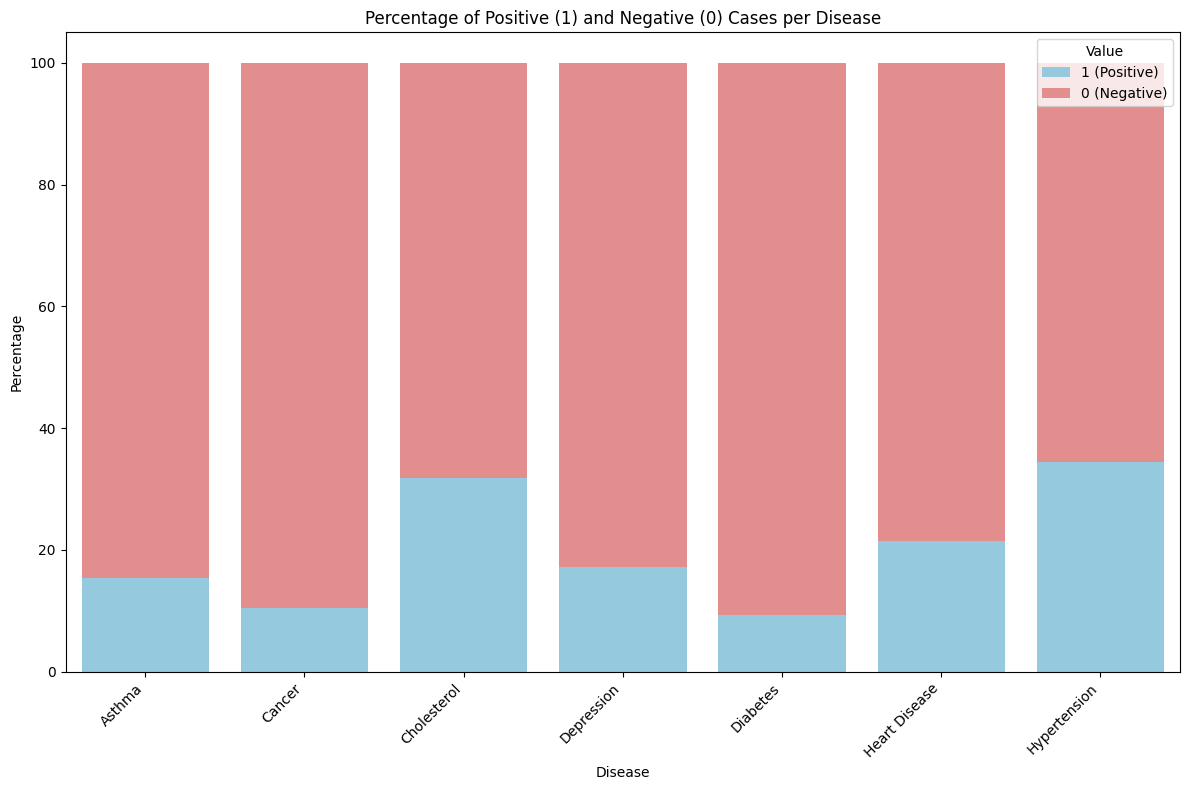

In [ ]:
# prompt: grafico barras % de 0 y 1

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of 0s and 1s for each disease
disease_percentages = converted_enf_df.melt(var_name='Disease', value_name='Value').dropna().groupby('Disease')['Value'].value_counts(normalize=True).unstack() * 100

# Ensure all columns have both 0 and 1, fill missing with 0
disease_percentages = disease_percentages.fillna(0)

# Rename columns for clarity in the plot
disease_percentages.columns = ['Percentage_0', 'Percentage_1']

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=disease_percentages.index, y='Percentage_1', data=disease_percentages, color='skyblue', label='1 (Positive)')
sns.barplot(x=disease_percentages.index, y='Percentage_0', data=disease_percentages, color='lightcoral', label='0 (Negative)', bottom=disease_percentages['Percentage_1'])

plt.ylabel('Percentage')
plt.xlabel('Disease')
plt.title('Percentage of Positive (1) and Negative (0) Cases per Disease')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Value')
plt.tight_layout()
plt.show()


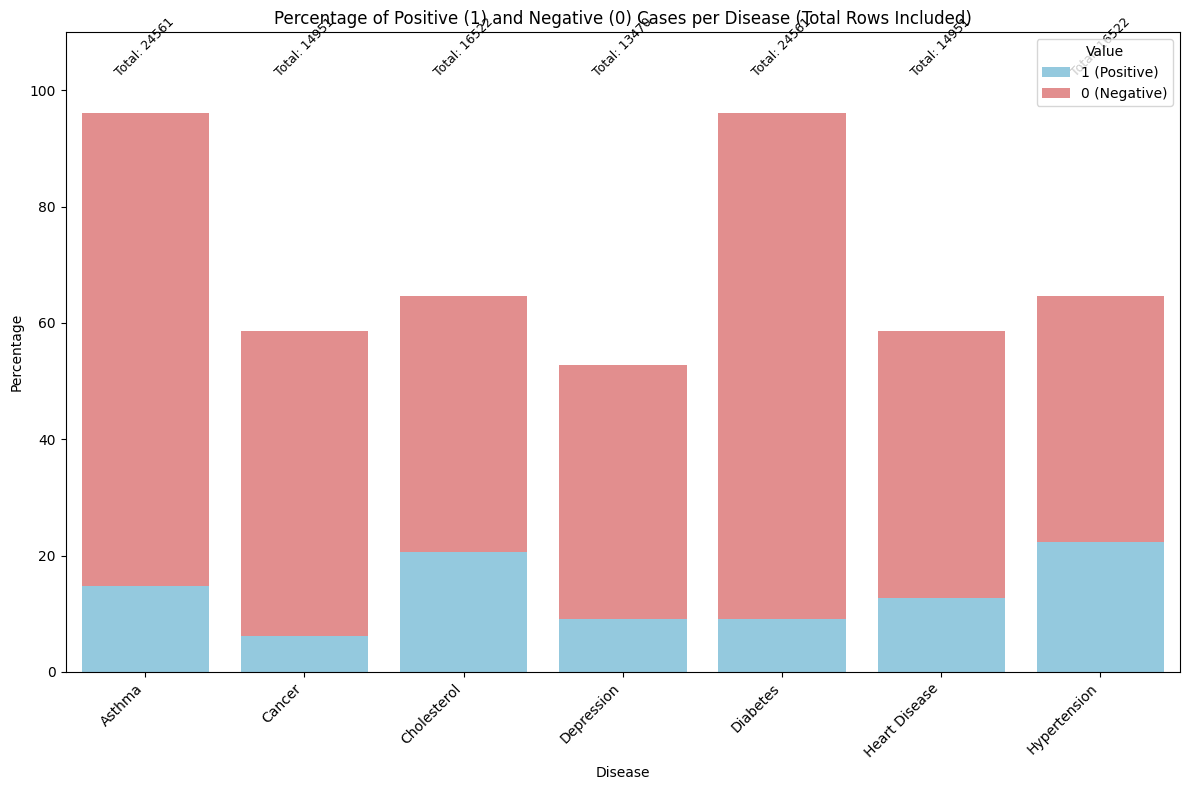

In [ ]:
# prompt: incluir en la grafica el count total de filas

import matplotlib.pyplot as plt
# Calculate the total number of rows
total_rows = converted_enf_df.shape[0]

# Calculate the percentage of 0s and 1s for each disease
disease_counts = converted_enf_df.melt(var_name='Disease', value_name='Value').dropna().groupby(['Disease', 'Value']).size().unstack()
disease_counts = disease_counts.fillna(0).astype(int)

# Calculate percentages based on the total number of rows
disease_percentages = (disease_counts / total_rows) * 100

# Rename columns for clarity in the plot
disease_percentages.columns = ['Percentage_0', 'Percentage_1']

# Add a column for the total count for each disease category for labeling
disease_counts['Total'] = disease_counts.sum(axis=1)


# Plotting the bar chart
plt.figure(figsize=(12, 8))
bar1 = sns.barplot(x=disease_percentages.index, y='Percentage_1', data=disease_percentages, color='skyblue', label='1 (Positive)')
bar2 = sns.barplot(x=disease_percentages.index, y='Percentage_0', data=disease_percentages, color='lightcoral', label='0 (Negative)', bottom=disease_percentages['Percentage_1'])

plt.ylabel('Percentage')
plt.xlabel('Disease')
plt.title('Percentage of Positive (1) and Negative (0) Cases per Disease (Total Rows Included)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Value')

# Add count labels on top of each bar group
for i, disease in enumerate(disease_percentages.index):
    total_count = disease_counts.loc[disease, 'Total']
    plt.text(i, 102, f'Total: {total_count}', ha='center', va='bottom', fontsize=9, rotation=45) # Adjusted position to be slightly above bars

plt.ylim(0, 110) # Adjust y-limit to make space for total count labels
plt.tight_layout()
plt.show()

In [ ]:
#  exportar csv

converted_enf_df.to_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/PREVALENCIA_ENFERMEDADES.csv', index=False)